<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Null-values-data" data-toc-modified-id="Null-values-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Null values data</a></span></li><li><span><a href="#Finding-categorical-columns" data-toc-modified-id="Finding-categorical-columns-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Finding categorical columns</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Feature engineering</a></span><ul class="toc-item"><li><span><a href="#Fixing-Age" data-toc-modified-id="Fixing-Age-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Fixing Age</a></span></li><li><span><a href="#Fixing-Fare" data-toc-modified-id="Fixing-Fare-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Fixing Fare</a></span></li><li><span><a href="#Fixing-Cabin" data-toc-modified-id="Fixing-Cabin-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Fixing Cabin</a></span></li><li><span><a href="#Combining-SibSp-and-Parch" data-toc-modified-id="Combining-SibSp-and-Parch-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Combining SibSp and Parch</a></span></li><li><span><a href="#Fixing-Name" data-toc-modified-id="Fixing-Name-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Fixing Name</a></span></li><li><span><a href="#Cleaning-the-Dataframe" data-toc-modified-id="Cleaning-the-Dataframe-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Cleaning the Dataframe</a></span></li></ul></li></ul></li><li><span><a href="#Separating-Test-and-Train-Data" data-toc-modified-id="Separating-Test-and-Train-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Separating Test and Train Data</a></span></li><li><span><a href="#Data-visualization" data-toc-modified-id="Data-visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data visualization</a></span></li><li><span><a href="#Split-data-into-validation-and-train-set" data-toc-modified-id="Split-data-into-validation-and-train-set-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Split data into validation and train set</a></span></li><li><span><a href="#Model-Creation" data-toc-modified-id="Model-Creation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Creation</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Deep-Dense-network" data-toc-modified-id="Deep-Dense-network-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Deep Dense network</a></span></li><li><span><a href="#Much-deep-deep-model" data-toc-modified-id="Much-deep-deep-model-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Much deep deep model</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = '../data/titanic_data/train.csv'
test_path = '../data/titanic_data/test.csv'

In [5]:
data = pd.read_csv(data_path)
data = data.set_index('PassengerId')
test = pd.read_csv(test_path, index_col='PassengerId')

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
all_data = pd.concat([data,test])

In [10]:
all_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
all_data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Data preprocessing

## Null values data

In [12]:
all_data.isnull().mean().sort_values(ascending=False)

Cabin       0.774637
Survived    0.319328
Age         0.200917
Embarked    0.001528
Fare        0.000764
Ticket      0.000000
Parch       0.000000
SibSp       0.000000
Sex         0.000000
Name        0.000000
Pclass      0.000000
dtype: float64

In [15]:
# Lets first handle Embarked column
embarked_mode = all_data.Embarked.mode()
all_data.Embarked.fillna(embarked_mode)

PassengerId
1       S
2       C
3       S
4       S
5       S
       ..
1305    S
1306    C
1307    S
1308    S
1309    C
Name: Embarked, Length: 1309, dtype: object

We will later handle 'Fare', 'Age' and 'Cabin'

## Finding categorical columns

In [17]:
columns = all_data.columns

In [52]:
cat_columns = ['Sex', 'Embarked']
for col in cat_columns:
    all_data[col] = all_data[col].astype('category')
    all_data[col+'_category'] = all_data[col].cat.codes
    columns = columns.append(pd.Index([col+'_category']))
print(columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Sex_category', 'Embarked_category',
       'Sex_category', 'Embarked_category'],
      dtype='object')


In [54]:
all_data.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_name,Sex_category,Embarked_category
PassengerId,,,,,,,,,,,,,,
468,0.0,1,"Smart, Mr. John Montgomery",male,56.00,0,0,113792,26.5500,U,S,U,1,2
41,0.0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.00,1,0,7546,9.4750,U,S,U,0,2
1229,NaN,3,"Elias, Mr. Joseph",male,39.00,0,2,2675,7.2292,U,C,U,1,0
857,1.0,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.00,1,1,36928,164.8667,U,S,U,0,2
1145,NaN,3,"Salander, Mr. Karl Johan",male,24.00,0,0,7266,9.3250,U,S,U,1,2
234,1.0,3,"Asplund, Miss. Lillian Gertrud",female,5.00,4,2,347077,31.3875,U,S,U,0,2
885,0.0,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,U,S,U,1,2
210,1.0,1,"Blank, Mr. Henry",male,40.00,0,0,112277,31.0000,A31,C,A,1,0
1246,NaN,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,U,S,U,0,2


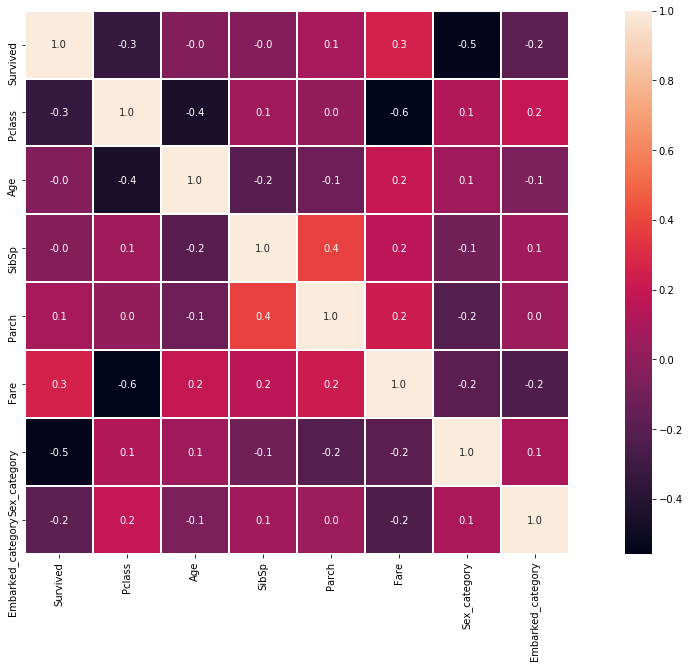

In [55]:
plt.figure(figsize=(20,10))
sns.heatmap(all_data.corr(),annot=True, fmt='0.1f', square=True, linewidths=1)

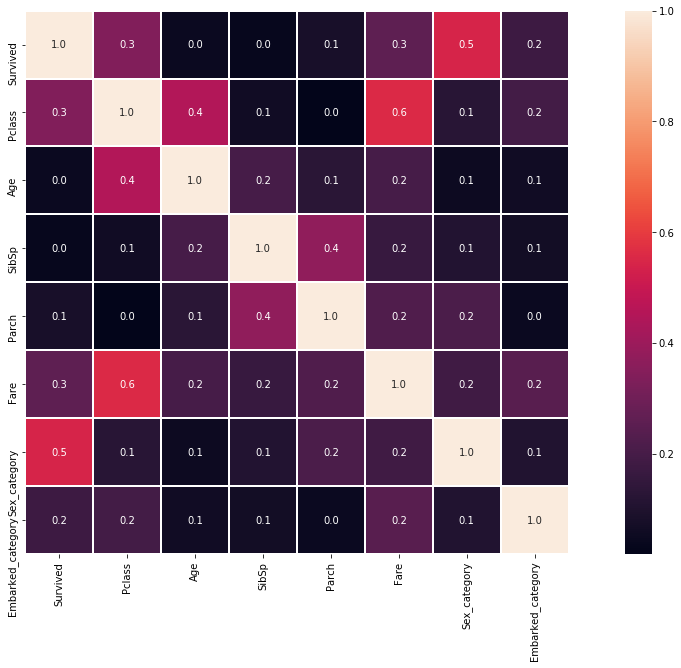

In [56]:
plt.figure(figsize=(20,10))
sns.heatmap(abs(all_data.corr()),annot=True, fmt='0.1f', square=True, linewidths=1)

## Feature engineering

We can see that (Pclass, Age) has a high absolute correlation. So we can use Pclass to impute Age missing values.

### Fixing Age

In [34]:
all_data.groupby('Pclass').Age.agg('median')

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

The above data shows the median age of people grouped by each Pclass

In [35]:
all_data['Age'] = all_data.groupby('Pclass').Age.transform(lambda x: x.fillna(x.median()))

In [36]:
all_data['Age'].isnull().sum()

0

### Fixing Fare

Similarly we can see that (Pclass, Fare) has a huge correlation. So using the same method to fillup Fare data.

In [38]:
all_data.groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [39]:
all_data['Fare'] = all_data.groupby('Pclass').Fare.transform(lambda x: x.fillna(x.median()))

In [40]:
all_data.Fare.isnull().sum()

0

### Fixing Cabin

For missing values in Cabin we can fill them with 'U' for undefined.

In [41]:
all_data['Cabin'] = all_data['Cabin'].fillna('U')

In [42]:
all_data.Cabin.isnull().sum()

0

Before we move forward lets have a look at the Cabin data and see if we can make sense of it.

In [43]:
all_data['Cabin'].unique()

array(['U', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

What we can understand from this is that the first letter might denote some usefull data like the deck floor value or something. The room numbers can be striped out.

In [46]:
all_data['Cabin_name'] = all_data['Cabin'].str.extract(r'([a-zA-Z]+)')

In [48]:
all_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_name
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,U
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,U
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,U


In [51]:
all_data['Cabin_name'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [57]:
# now converting this data into category
all_data['Cabin_name'] = all_data['Cabin_name'].astype('category')
all_data['Cabin_category'] = all_data['Cabin_name'].cat.codes

In [58]:
all_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_name,Sex_category,Embarked_category,Cabin_category
PassengerId,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,U,1,2,8
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,0,0,2
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,U,0,2,8
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,0,2,2
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,U,1,2,8


### Combining SibSp and Parch

We can club the 'SibSp' and 'Parch' together to see how many family members did a passenger have.

In [59]:
all_data['Family_member'] = all_data['SibSp'] + all_data['Parch'] + 1
all_data.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_name,Sex_category,Embarked_category,Cabin_category,Family_member
PassengerId,,,,,,,,,,,,,,,,
491,0.0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,24.0,1,0,65304,19.9667,U,S,U,1,2,8,2
1049,NaN,3,"Lundin, Miss. Olga Elida",female,23.0,0,0,347469,7.8542,U,S,U,0,2,8,1
867,1.0,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,U,C,U,0,0,8,2
1265,NaN,2,"Harbeck, Mr. William H",male,44.0,0,0,248746,13.0000,U,S,U,1,2,8,1
330,1.0,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C,B,0,0,1,2
813,0.0,2,"Slemen, Mr. Richard James",male,35.0,0,0,28206,10.5000,U,S,U,1,2,8,1
1087,NaN,3,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,347465,7.8542,U,S,U,1,2,8,1
880,1.0,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,C,0,0,2,2
561,0.0,3,"Morrow, Mr. Thomas Rowan",male,24.0,0,0,372622,7.7500,U,Q,U,1,1,8,1


### Fixing Name

Lets see if we can do the same thing with Name like we did with Cabin.

In [60]:
all_data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

Looks messy but the title of each name can be important to us. So lets extract the title.

In [65]:
all_data['Title'] = all_data['Name'].str.extract(r'([A-Za-z]+)\.')

In [66]:
all_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [67]:
all_data['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Major         2
Mlle          2
Countess      1
Jonkheer      1
Sir           1
Lady          1
Mme           1
Don           1
Capt          1
Dona          1
Name: Title, dtype: int64

It seems that apart from Mr, Miss, Mrs, Master, Dr, Rev, others are quite low in number. Which means they can be grouped togther to form a grouped data, like [Countess, Jonkheer, ... Dona] -> Others.

In [69]:
all_data['Title'] = all_data['Title'].replace(['Countess', 'Jonkheer', 'Sir', 'Lady', 'Mme', 'Don', 'Capt', 'Dona'],'Other')

In [70]:
all_data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev', 'Dr', 'Ms', 'Major',
       'Mlle', 'Col'], dtype=object)

In [71]:
# Converting title into category codes
all_data['Title'] = all_data.Title.astype('category')
all_data['Title_category'] = all_data['Title'].cat.codes
all_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_name,Sex_category,Embarked_category,Cabin_category,Family_member,Title,Title_category
PassengerId,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,U,1,2,8,2,Mr,6
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,0,0,2,2,Mrs,7
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,U,0,2,8,1,Miss,4
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,0,2,2,2,Mrs,7
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,U,1,2,8,1,Mr,6


### Cleaning the Dataframe

I dont see any use of the Ticket column so droping it. Also dropping the columns which have been used to create category columns and which now serves no purpose.

In [73]:
columns_to_drop = ['Ticket', 'Name', 'Title', 'SibSp', 'Parch', 'Sex', 'Cabin', 'Embarked', 'Cabin_name']
all_data = all_data.drop(columns_to_drop, axis=1)
all_data.head()

,Survived,Pclass,Age,Fare,Sex_category,Embarked_category,Cabin_category,Family_member,Title_category
PassengerId,,,,,,,,,
1,0.0,3,22.0,7.2500,1,2,8,2,6
2,1.0,1,38.0,71.2833,0,0,2,2,7
3,1.0,3,26.0,7.9250,0,2,8,1,4
4,1.0,1,35.0,53.1000,0,2,2,2,7
5,0.0,3,35.0,8.0500,1,2,8,1,6


In [90]:
columns = all_data.columns.copy()
print(columns)

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Sex_category',
       'Embarked_category', 'Cabin_category', 'Family_member',
       'Title_category'],
      dtype='object')


# Separating Test and Train Data

In [78]:
test_data = all_data[all_data['Survived'].isnull()]
test_data = test_data.drop('Survived', axis = 1)
test_data.head()

,Pclass,Age,Fare,Sex_category,Embarked_category,Cabin_category,Family_member,Title_category
PassengerId,,,,,,,,
892,3,34.5,7.8292,1,1,8,1,6
893,3,47.0,7.0000,0,2,8,2,7
894,2,62.0,9.6875,1,1,8,1,6
895,3,27.0,8.6625,1,2,8,1,6
896,3,22.0,12.2875,0,2,8,3,7


In [79]:
train_data = all_data[all_data['Survived'].notnull()]
train_data.head()

,Survived,Pclass,Age,Fare,Sex_category,Embarked_category,Cabin_category,Family_member,Title_category
PassengerId,,,,,,,,,
1,0.0,3,22.0,7.2500,1,2,8,2,6
2,1.0,1,38.0,71.2833,0,0,2,2,7
3,1.0,3,26.0,7.9250,0,2,8,1,4
4,1.0,1,35.0,53.1000,0,2,2,2,7
5,0.0,3,35.0,8.0500,1,2,8,1,6


# Data visualization

We will now perform all visualization on train_data.

In [92]:
train_data.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Sex_category',
       'Embarked_category', 'Cabin_category', 'Family_member',
       'Title_category'],
      dtype='object')

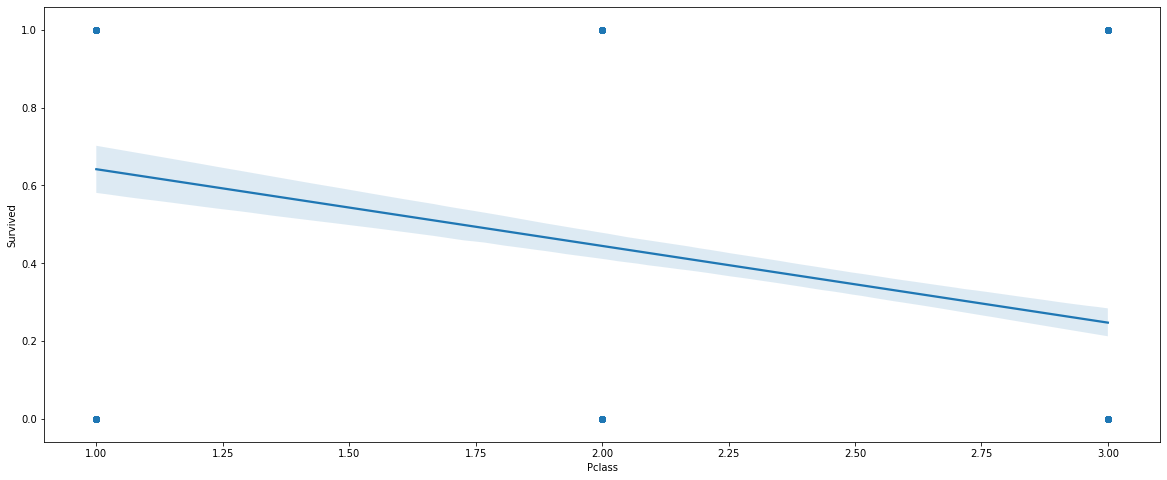

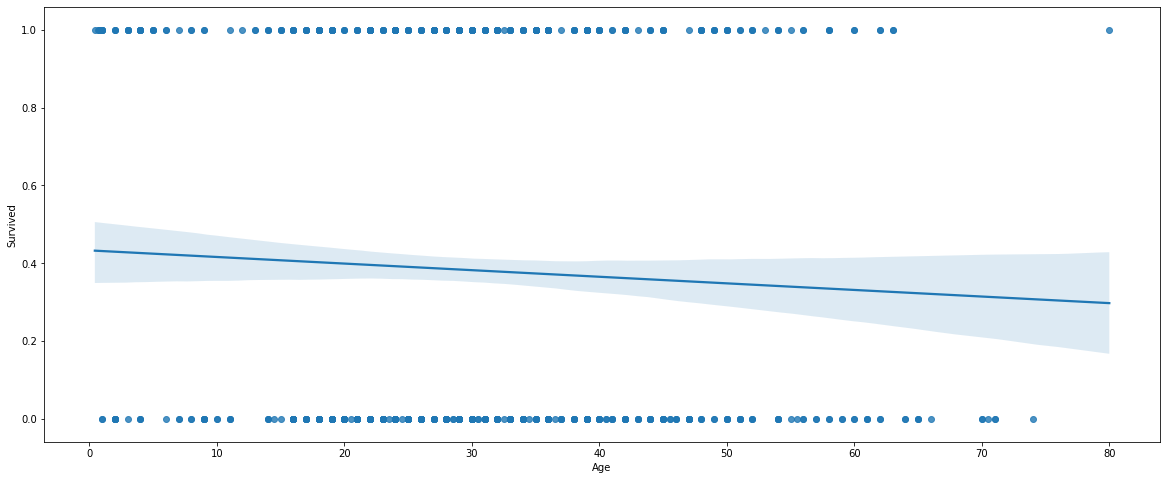

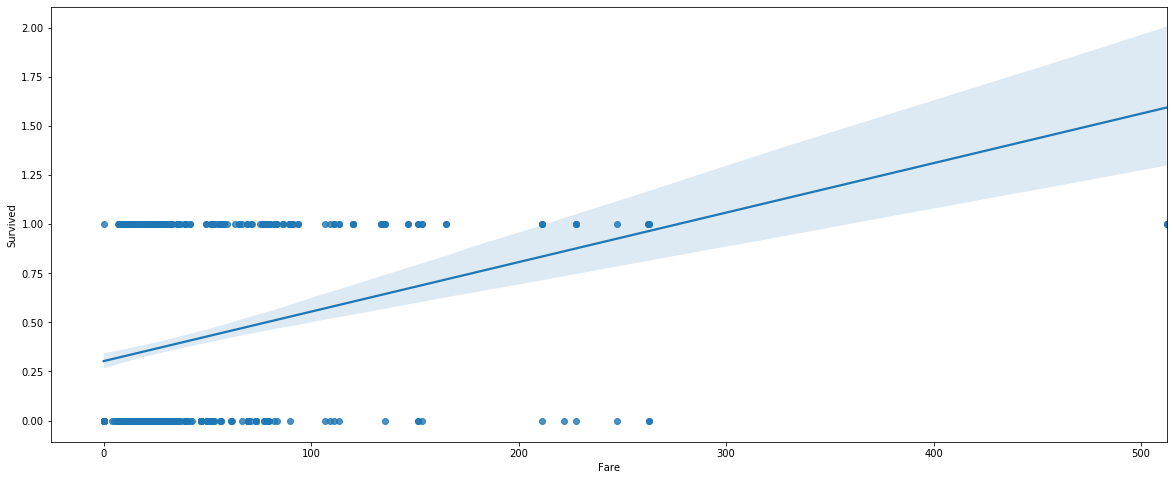

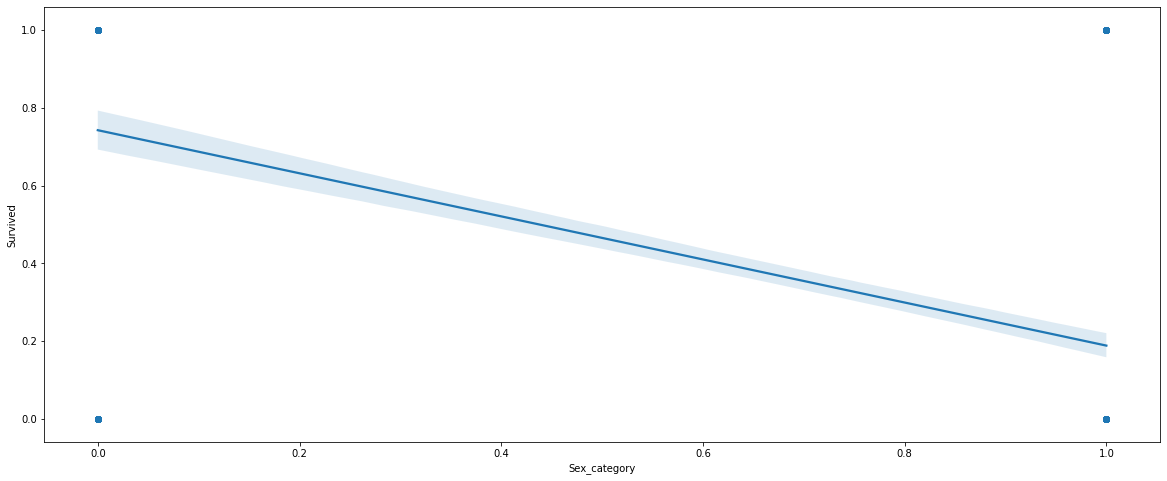

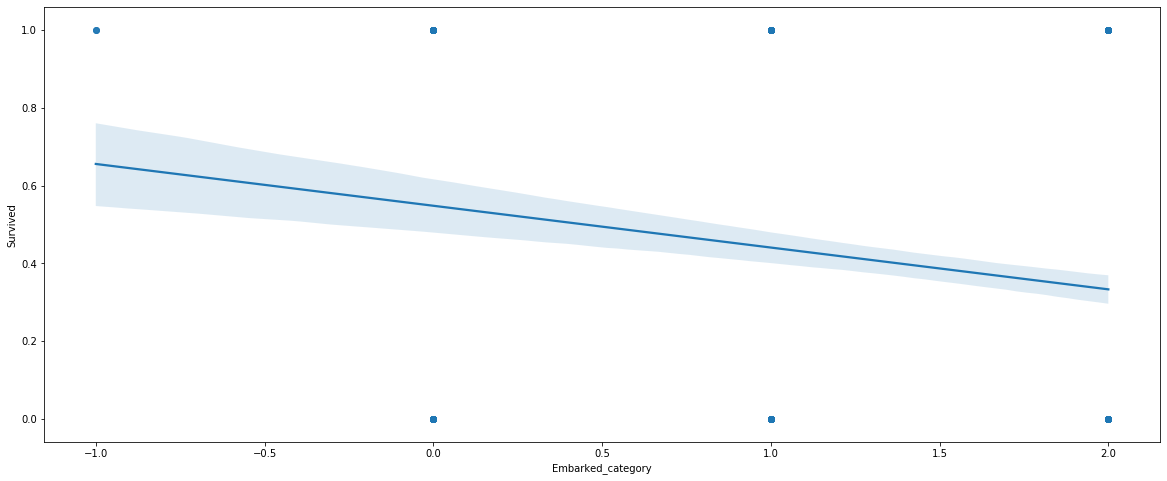

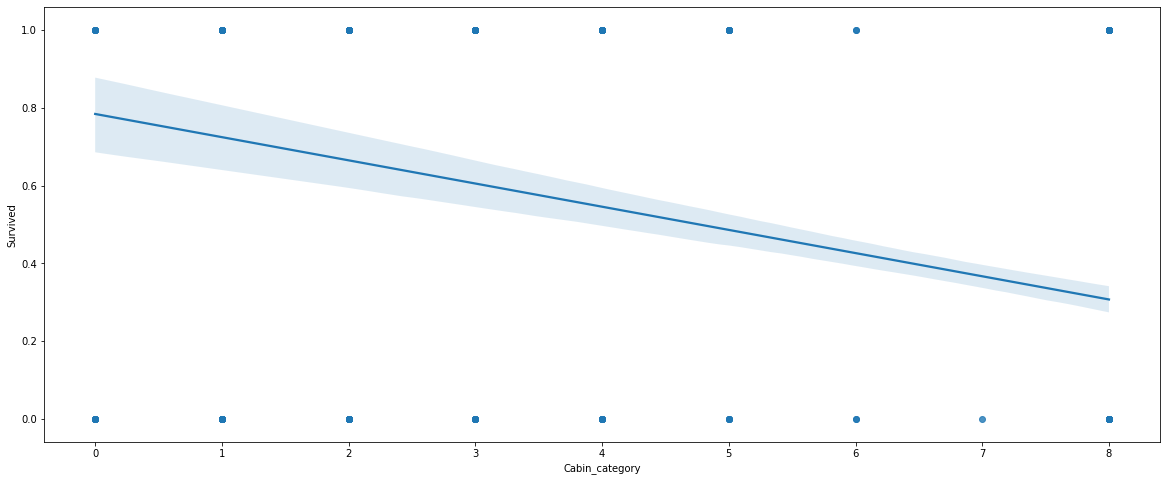

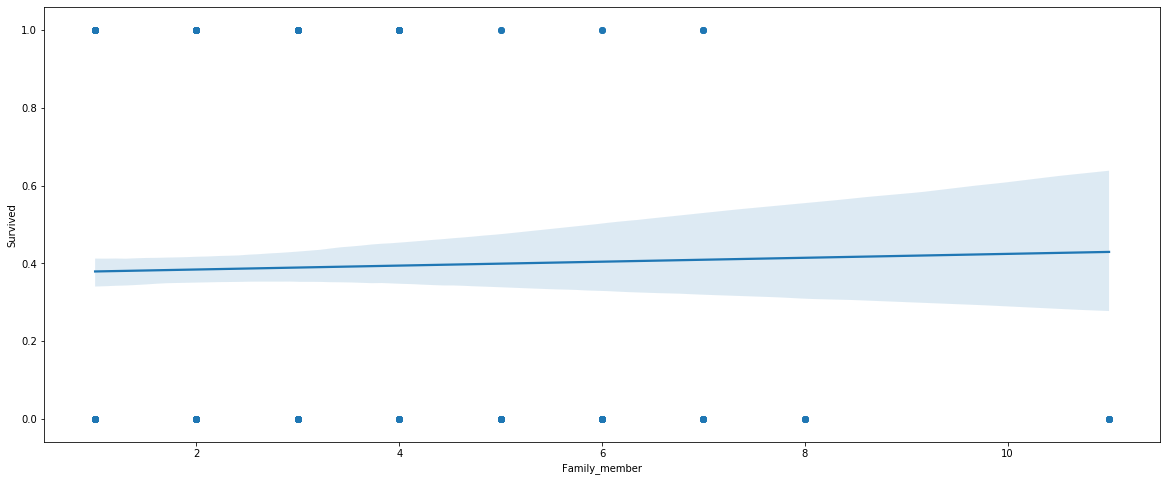

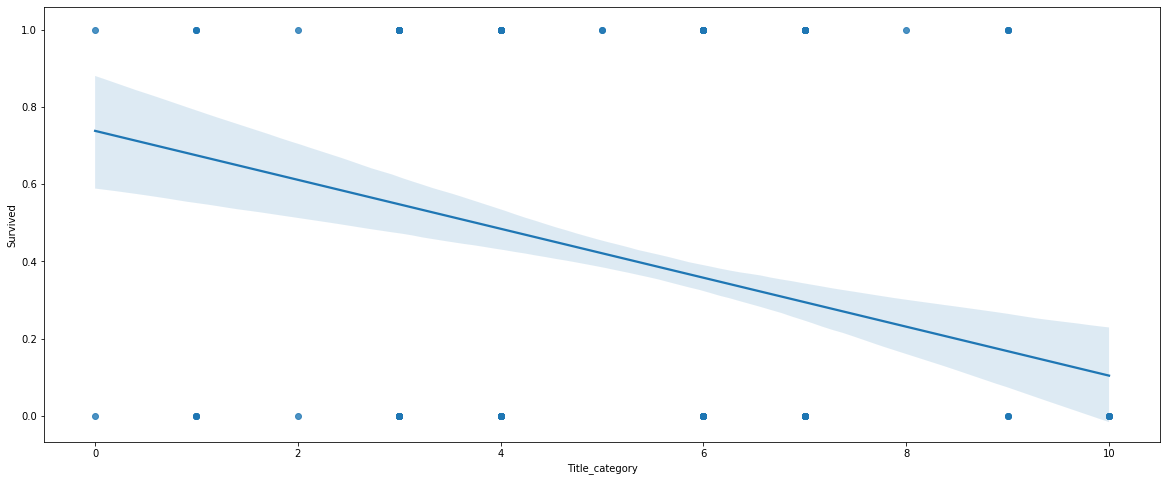

In [93]:
columns = columns.drop('Survived')
for col in columns:
    plt.figure(figsize=(20,8))
    sns.regplot(x = train_data[col], y = train_data['Survived'])

 - Survived vs Pclass -> Pclass with 0 has more rate
 - Survived vs Age    -> Age has a bit of -ve correlation with Survived
 - Survived vs Fare   -> There is good +ve correlation
 - Survived vs Sex_Cat-> Female had more chances of survival
 - Survived vs Embarked_cat -> Embarked cat of 0 has more survival rate
 - Survived vs Family_member-> it kind of has no correlation

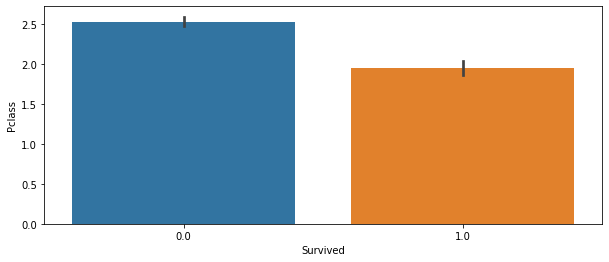

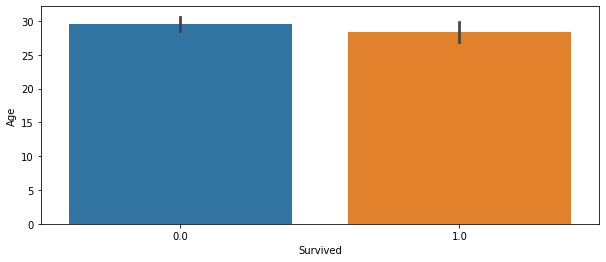

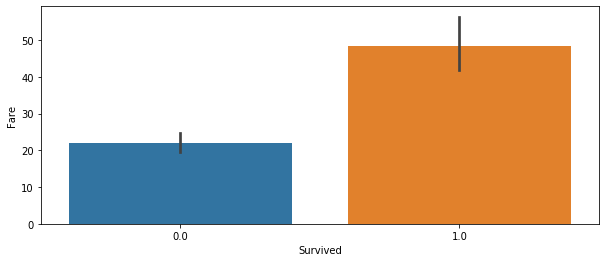

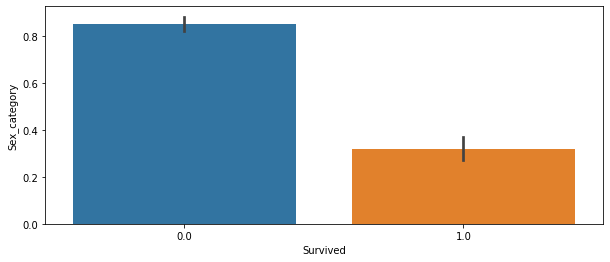

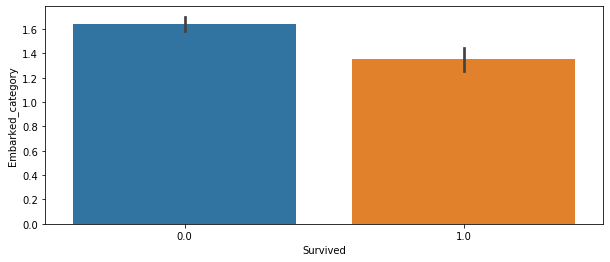

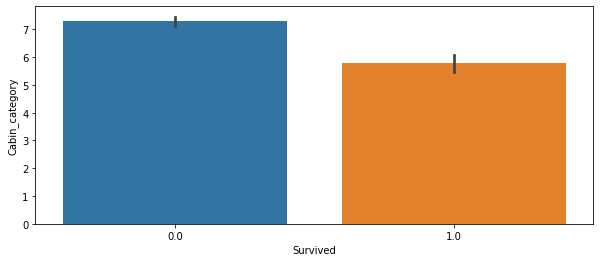

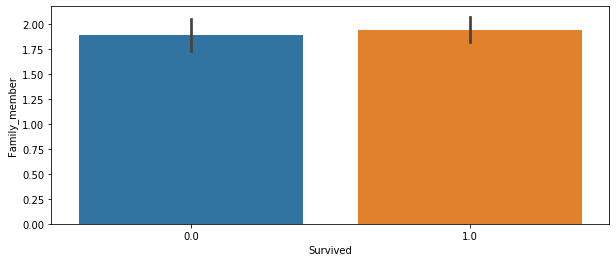

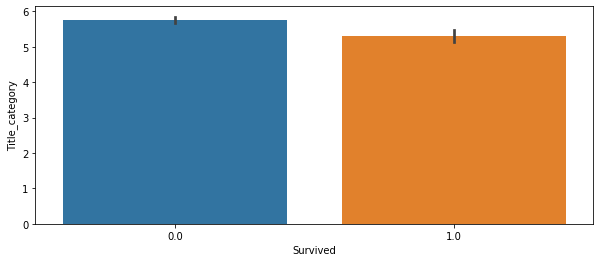

In [94]:
for col in columns:
    plt.figure(figsize=(10,4))
    sns.barplot(x = train_data['Survived'], y = train_data[col])

# Split data into validation and train set

In [97]:
train_length = int(0.7*len(train_data))
print(train_length)

623


In [99]:
train_set = train_data[:train_length]
validation_set = train_data[train_length:]
print(train_set.shape)
print(validation_set.shape)

(623, 9)
(268, 9)


In [100]:
train_set.head()

,Survived,Pclass,Age,Fare,Sex_category,Embarked_category,Cabin_category,Family_member,Title_category
PassengerId,,,,,,,,,
1,0.0,3,22.0,7.2500,1,2,8,2,6
2,1.0,1,38.0,71.2833,0,0,2,2,7
3,1.0,3,26.0,7.9250,0,2,8,1,4
4,1.0,1,35.0,53.1000,0,2,2,2,7
5,0.0,3,35.0,8.0500,1,2,8,1,6


In [101]:
validation_set.head()

,Survived,Pclass,Age,Fare,Sex_category,Embarked_category,Cabin_category,Family_member,Title_category
PassengerId,,,,,,,,,
624,0.0,3,21.0,7.8542,1,2,8,1,6
625,0.0,3,21.0,16.1000,1,2,8,1,6
626,0.0,1,61.0,32.3208,1,2,3,1,6
627,0.0,2,57.0,12.3500,1,1,8,1,10
628,1.0,1,21.0,77.9583,0,2,3,1,4


In [106]:
X_train = train_set[columns]
y_train = train_set['Survived']
print('Shape of train set x: '+ str(X_train.shape))
print('Shape of train set y: '+ str(y_train.shape))

Shape of train set x: (623, 8)
Shape of train set y: (623,)


In [107]:
X_val = validation_set[columns]
y_val = validation_set['Survived']
print('Shape of validation set x: '+ str(X_val.shape))
print('Shape of validation set y:' + str(y_val.shape))

Shape of validation set x: (268, 8)
Shape of validation set y:(268,)


# Model Creation

as we can see from the correlation map that except from Family_member column, others have either a nice amount of correlation.

In [95]:
print(columns)

Index(['Pclass', 'Age', 'Fare', 'Sex_category', 'Embarked_category',
       'Cabin_category', 'Family_member', 'Title_category'],
      dtype='object')


In [115]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [104]:
n_features = len(columns)
print(n_features)

8


## Logistic regression

In [121]:
model_lr = Sequential()
model_lr.add(Dense(1, activation='sigmoid', input_dim = n_features))

In [123]:
model_lr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [124]:
model_lr.fit(X_train.values, y_train.values, epochs=10000, batch_size=32, verbose=1)

Train on 623 samples
Epoch 1/10000
623/623 [==============================] - 0s 586us/sample - loss: 5.1529 - accuracy: 0.6661
Epoch 2/10000
623/623 [==============================] - 0s 112us/sample - loss: 5.0029 - accuracy: 0.6677
Epoch 3/10000
623/623 [==============================] - 0s 110us/sample - loss: 4.8449 - accuracy: 0.6693
Epoch 4/10000
623/623 [==============================] - 0s 120us/sample - loss: 4.6961 - accuracy: 0.6742
Epoch 5/10000
623/623 [==============================] - 0s 84us/sample - loss: 4.5489 - accuracy: 0.6774
Epoch 6/10000
623/623 [==============================] - 0s 83us/sample - loss: 4.4054 - accuracy: 0.6758
Epoch 7/10000
623/623 [==============================] - 0s 88us/sample - loss: 4.2702 - accuracy: 0.6693
Epoch 8/10000
623/623 [==============================] - 0s 81us/sample - loss: 4.1371 - accuracy: 0.6726
Epoch 9/10000
623/623 [==============================] - 0s 81us/sample - loss: 4.0101 - accuracy: 0.6629
Epoch 10/10000
623/62

623/623 [==============================] - 0s 123us/sample - loss: 0.5031 - accuracy: 0.7897
Epoch 154/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.5032 - accuracy: 0.7913
Epoch 155/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.5040 - accuracy: 0.7865
Epoch 156/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.5029 - accuracy: 0.7978
Epoch 157/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.5026 - accuracy: 0.7945
Epoch 158/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.5021 - accuracy: 0.7913
Epoch 159/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.5018 - accuracy: 0.7929
Epoch 160/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.5013 - accuracy: 0.7945
Epoch 161/10000
623/623 [==============================] - 0s 131us/sample - loss: 0.5018 - accuracy: 0.7913
Epoch 162/10000
623/623 [=================

623/623 [==============================] - 0s 92us/sample - loss: 0.4865 - accuracy: 0.7801
Epoch 304/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4866 - accuracy: 0.7801
Epoch 305/10000
623/623 [==============================] - 0s 83us/sample - loss: 0.4889 - accuracy: 0.7897
Epoch 306/10000
623/623 [==============================] - 0s 143us/sample - loss: 0.4876 - accuracy: 0.7753
Epoch 307/10000
623/623 [==============================] - 0s 97us/sample - loss: 0.4887 - accuracy: 0.7817
Epoch 308/10000
623/623 [==============================] - 0s 82us/sample - loss: 0.4863 - accuracy: 0.7769
Epoch 309/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4862 - accuracy: 0.7785
Epoch 310/10000
623/623 [==============================] - 0s 82us/sample - loss: 0.4867 - accuracy: 0.7833
Epoch 311/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4858 - accuracy: 0.7785
Epoch 312/10000
623/623 [==================

623/623 [==============================] - 0s 88us/sample - loss: 0.4793 - accuracy: 0.7817
Epoch 454/10000
623/623 [==============================] - 0s 91us/sample - loss: 0.4807 - accuracy: 0.7801
Epoch 455/10000
623/623 [==============================] - 0s 87us/sample - loss: 0.4806 - accuracy: 0.7913
Epoch 456/10000
623/623 [==============================] - 0s 87us/sample - loss: 0.4822 - accuracy: 0.7785
Epoch 457/10000
623/623 [==============================] - 0s 86us/sample - loss: 0.4807 - accuracy: 0.7865
Epoch 458/10000
623/623 [==============================] - 0s 119us/sample - loss: 0.4798 - accuracy: 0.7849
Epoch 459/10000
623/623 [==============================] - 0s 220us/sample - loss: 0.4810 - accuracy: 0.7753
Epoch 460/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4797 - accuracy: 0.7785
Epoch 461/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4792 - accuracy: 0.7881
Epoch 462/10000
623/623 [=================

Epoch 529/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4766 - accuracy: 0.7801
Epoch 530/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4794 - accuracy: 0.7833
Epoch 531/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4787 - accuracy: 0.7913
Epoch 532/10000
623/623 [==============================] - 0s 69us/sample - loss: 0.4768 - accuracy: 0.7817
Epoch 533/10000
623/623 [==============================] - 0s 68us/sample - loss: 0.4766 - accuracy: 0.7801
Epoch 534/10000
623/623 [==============================] - 0s 67us/sample - loss: 0.4779 - accuracy: 0.7961
Epoch 535/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4787 - accuracy: 0.7769
Epoch 536/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4775 - accuracy: 0.7913
Epoch 537/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4773 - accuracy: 0.7833
Epoch 538/10000
623/623 [===

Epoch 680/10000
623/623 [==============================] - 0s 115us/sample - loss: 0.4720 - accuracy: 0.7849
Epoch 681/10000
623/623 [==============================] - 0s 86us/sample - loss: 0.4726 - accuracy: 0.7897
Epoch 682/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4727 - accuracy: 0.7913
Epoch 683/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4725 - accuracy: 0.7865
Epoch 684/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4735 - accuracy: 0.7817
Epoch 685/10000
623/623 [==============================] - 0s 69us/sample - loss: 0.4717 - accuracy: 0.7897
Epoch 686/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4726 - accuracy: 0.7881
Epoch 687/10000
623/623 [==============================] - 0s 66us/sample - loss: 0.4733 - accuracy: 0.7929
Epoch 688/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4730 - accuracy: 0.7785
Epoch 689/10000
623/623 [==

Epoch 831/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4682 - accuracy: 0.7913
Epoch 832/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4683 - accuracy: 0.7881
Epoch 833/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4679 - accuracy: 0.7929
Epoch 834/10000
623/623 [==============================] - 0s 68us/sample - loss: 0.4697 - accuracy: 0.7881
Epoch 835/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4690 - accuracy: 0.7833
Epoch 836/10000
623/623 [==============================] - 0s 65us/sample - loss: 0.4680 - accuracy: 0.7881
Epoch 837/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4685 - accuracy: 0.7865
Epoch 838/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4684 - accuracy: 0.7913
Epoch 839/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4675 - accuracy: 0.7913
Epoch 840/10000
623/623 [===

623/623 [==============================] - 0s 73us/sample - loss: 0.4656 - accuracy: 0.7897
Epoch 982/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4652 - accuracy: 0.7881
Epoch 983/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4666 - accuracy: 0.7929
Epoch 984/10000
623/623 [==============================] - 0s 68us/sample - loss: 0.4656 - accuracy: 0.7865
Epoch 985/10000
623/623 [==============================] - 0s 82us/sample - loss: 0.4670 - accuracy: 0.8010
Epoch 986/10000
623/623 [==============================] - 0s 68us/sample - loss: 0.4649 - accuracy: 0.7897
Epoch 987/10000
623/623 [==============================] - 0s 67us/sample - loss: 0.4659 - accuracy: 0.7833
Epoch 988/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4653 - accuracy: 0.7961
Epoch 989/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4647 - accuracy: 0.7881
Epoch 990/10000
623/623 [===================

623/623 [==============================] - 0s 142us/sample - loss: 0.4636 - accuracy: 0.7865
Epoch 1132/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4641 - accuracy: 0.7978
Epoch 1133/10000
623/623 [==============================] - 0s 91us/sample - loss: 0.4641 - accuracy: 0.7833
Epoch 1134/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4644 - accuracy: 0.7849
Epoch 1135/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4632 - accuracy: 0.7994
Epoch 1136/10000
623/623 [==============================] - 0s 90us/sample - loss: 0.4622 - accuracy: 0.7913
Epoch 1137/10000
623/623 [==============================] - 0s 121us/sample - loss: 0.4625 - accuracy: 0.7865
Epoch 1138/10000
623/623 [==============================] - 0s 133us/sample - loss: 0.4629 - accuracy: 0.7961
Epoch 1139/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4636 - accuracy: 0.7881
Epoch 1140/10000
623/623 [=======

623/623 [==============================] - 0s 77us/sample - loss: 0.4644 - accuracy: 0.7817
Epoch 1207/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4647 - accuracy: 0.7978
Epoch 1208/10000
623/623 [==============================] - 0s 147us/sample - loss: 0.4632 - accuracy: 0.7849
Epoch 1209/10000
623/623 [==============================] - 0s 160us/sample - loss: 0.4641 - accuracy: 0.7994
Epoch 1210/10000
623/623 [==============================] - 0s 146us/sample - loss: 0.4609 - accuracy: 0.7913
Epoch 1211/10000
623/623 [==============================] - 0s 132us/sample - loss: 0.4619 - accuracy: 0.7897
Epoch 1212/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4617 - accuracy: 0.7849
Epoch 1213/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4632 - accuracy: 0.7945
Epoch 1214/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4621 - accuracy: 0.7865
Epoch 1215/10000
623/623 [=====

Epoch 1281/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4612 - accuracy: 0.7945
Epoch 1282/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4609 - accuracy: 0.7897
Epoch 1283/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4608 - accuracy: 0.7865
Epoch 1284/10000
623/623 [==============================] - 0s 69us/sample - loss: 0.4631 - accuracy: 0.7881
Epoch 1285/10000
623/623 [==============================] - 0s 68us/sample - loss: 0.4604 - accuracy: 0.7994
Epoch 1286/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4616 - accuracy: 0.7913
Epoch 1287/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4610 - accuracy: 0.7961
Epoch 1288/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4610 - accuracy: 0.7865
Epoch 1289/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4608 - accuracy: 0.7961
Epoch 1290/10000
62

623/623 [==============================] - 0s 72us/sample - loss: 0.4626 - accuracy: 0.8010
Epoch 1357/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4619 - accuracy: 0.7865
Epoch 1358/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4613 - accuracy: 0.7994
Epoch 1359/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4606 - accuracy: 0.7849
Epoch 1360/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4598 - accuracy: 0.7897
Epoch 1361/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4613 - accuracy: 0.7961
Epoch 1362/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4610 - accuracy: 0.7881
Epoch 1363/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4599 - accuracy: 0.7913
Epoch 1364/10000
623/623 [==============================] - 0s 69us/sample - loss: 0.4594 - accuracy: 0.7929
Epoch 1365/10000
623/623 [==========

623/623 [==============================] - 0s 92us/sample - loss: 0.4584 - accuracy: 0.7929
Epoch 1507/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4574 - accuracy: 0.7929
Epoch 1508/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4596 - accuracy: 0.7865
Epoch 1509/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4592 - accuracy: 0.7961
Epoch 1510/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4587 - accuracy: 0.7913
Epoch 1511/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4587 - accuracy: 0.7897
Epoch 1512/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4589 - accuracy: 0.7961
Epoch 1513/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4592 - accuracy: 0.7897
Epoch 1514/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4592 - accuracy: 0.7945
Epoch 1515/10000
623/623 [==========

623/623 [==============================] - 0s 91us/sample - loss: 0.4578 - accuracy: 0.7978
Epoch 1657/10000
623/623 [==============================] - 0s 84us/sample - loss: 0.4591 - accuracy: 0.7913
Epoch 1658/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4576 - accuracy: 0.7978
Epoch 1659/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4608 - accuracy: 0.7897
Epoch 1660/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4580 - accuracy: 0.7994
Epoch 1661/10000
623/623 [==============================] - 0s 88us/sample - loss: 0.4578 - accuracy: 0.7978
Epoch 1662/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4596 - accuracy: 0.7897
Epoch 1663/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4565 - accuracy: 0.7961
Epoch 1664/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4571 - accuracy: 0.7961
Epoch 1665/10000
623/623 [==========

623/623 [==============================] - 0s 78us/sample - loss: 0.4572 - accuracy: 0.7897
Epoch 1807/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4561 - accuracy: 0.7945
Epoch 1808/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4563 - accuracy: 0.7913
Epoch 1809/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4560 - accuracy: 0.8026
Epoch 1810/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4562 - accuracy: 0.8042
Epoch 1811/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4561 - accuracy: 0.7961
Epoch 1812/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4559 - accuracy: 0.7897
Epoch 1813/10000
623/623 [==============================] - 0s 69us/sample - loss: 0.4569 - accuracy: 0.8010
Epoch 1814/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4562 - accuracy: 0.7929
Epoch 1815/10000
623/623 [==========

623/623 [==============================] - 0s 70us/sample - loss: 0.4559 - accuracy: 0.7945
Epoch 1957/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4577 - accuracy: 0.8010
Epoch 1958/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4557 - accuracy: 0.7929
Epoch 1959/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4567 - accuracy: 0.7994
Epoch 1960/10000
623/623 [==============================] - 0s 84us/sample - loss: 0.4561 - accuracy: 0.7961
Epoch 1961/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4549 - accuracy: 0.8026
Epoch 1962/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4563 - accuracy: 0.7929
Epoch 1963/10000
623/623 [==============================] - 0s 97us/sample - loss: 0.4555 - accuracy: 0.8026
Epoch 1964/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4554 - accuracy: 0.8026
Epoch 1965/10000
623/623 [==========

623/623 [==============================] - 0s 86us/sample - loss: 0.4546 - accuracy: 0.8042
Epoch 2107/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4565 - accuracy: 0.8074
Epoch 2108/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4560 - accuracy: 0.7929
Epoch 2109/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4550 - accuracy: 0.8026
Epoch 2110/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4549 - accuracy: 0.7945
Epoch 2111/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4556 - accuracy: 0.8042
Epoch 2112/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4550 - accuracy: 0.7978
Epoch 2113/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4555 - accuracy: 0.8010
Epoch 2114/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4539 - accuracy: 0.8026
Epoch 2115/10000
623/623 [==========

623/623 [==============================] - 0s 74us/sample - loss: 0.4551 - accuracy: 0.8058
Epoch 2257/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4545 - accuracy: 0.8042
Epoch 2258/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4540 - accuracy: 0.8026
Epoch 2259/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4558 - accuracy: 0.7961
Epoch 2260/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4551 - accuracy: 0.8026
Epoch 2261/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4541 - accuracy: 0.8010
Epoch 2262/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4540 - accuracy: 0.7994
Epoch 2263/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4555 - accuracy: 0.8042
Epoch 2264/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4547 - accuracy: 0.7994
Epoch 2265/10000
623/623 [==========

623/623 [==============================] - 0s 75us/sample - loss: 0.4571 - accuracy: 0.8042
Epoch 2407/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4539 - accuracy: 0.7994
Epoch 2408/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4552 - accuracy: 0.8026
Epoch 2409/10000
623/623 [==============================] - 0s 69us/sample - loss: 0.4550 - accuracy: 0.8042
Epoch 2410/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4534 - accuracy: 0.8042
Epoch 2411/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4546 - accuracy: 0.7978
Epoch 2412/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4536 - accuracy: 0.8042
Epoch 2413/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4537 - accuracy: 0.8074
Epoch 2414/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4550 - accuracy: 0.7961
Epoch 2415/10000
623/623 [==========

623/623 [==============================] - 0s 77us/sample - loss: 0.4544 - accuracy: 0.7961
Epoch 2557/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4533 - accuracy: 0.8026
Epoch 2558/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4545 - accuracy: 0.8026
Epoch 2559/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4542 - accuracy: 0.7994
Epoch 2560/10000
623/623 [==============================] - 0s 84us/sample - loss: 0.4536 - accuracy: 0.8042
Epoch 2561/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4541 - accuracy: 0.8074
Epoch 2562/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4595 - accuracy: 0.7817
Epoch 2563/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4546 - accuracy: 0.8010
Epoch 2564/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4535 - accuracy: 0.8058
Epoch 2565/10000
623/623 [==========

623/623 [==============================] - 0s 76us/sample - loss: 0.4565 - accuracy: 0.7897
Epoch 2707/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.4545 - accuracy: 0.7994
Epoch 2708/10000
623/623 [==============================] - 0s 91us/sample - loss: 0.4544 - accuracy: 0.7978
Epoch 2709/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4535 - accuracy: 0.8026
Epoch 2710/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4534 - accuracy: 0.8010
Epoch 2711/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4546 - accuracy: 0.8074
Epoch 2712/10000
623/623 [==============================] - 0s 83us/sample - loss: 0.4532 - accuracy: 0.7978
Epoch 2713/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4540 - accuracy: 0.8026
Epoch 2714/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4537 - accuracy: 0.8042
Epoch 2715/10000
623/623 [=========

623/623 [==============================] - 0s 83us/sample - loss: 0.4528 - accuracy: 0.8042
Epoch 2857/10000
623/623 [==============================] - 0s 84us/sample - loss: 0.4540 - accuracy: 0.7961
Epoch 2858/10000
623/623 [==============================] - 0s 96us/sample - loss: 0.4533 - accuracy: 0.8074
Epoch 2859/10000
623/623 [==============================] - 0s 118us/sample - loss: 0.4540 - accuracy: 0.7994
Epoch 2860/10000
623/623 [==============================] - 0s 112us/sample - loss: 0.4551 - accuracy: 0.8010
Epoch 2861/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4534 - accuracy: 0.7978
Epoch 2862/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4548 - accuracy: 0.8026
Epoch 2863/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4541 - accuracy: 0.7978
Epoch 2864/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4523 - accuracy: 0.8042
Epoch 2865/10000
623/623 [========

623/623 [==============================] - 0s 76us/sample - loss: 0.4549 - accuracy: 0.7994
Epoch 3007/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4532 - accuracy: 0.7994
Epoch 3008/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4529 - accuracy: 0.8074
Epoch 3009/10000
623/623 [==============================] - 0s 82us/sample - loss: 0.4526 - accuracy: 0.8074
Epoch 3010/10000
623/623 [==============================] - 0s 69us/sample - loss: 0.4530 - accuracy: 0.8026
Epoch 3011/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4527 - accuracy: 0.8058
Epoch 3012/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4530 - accuracy: 0.8026
Epoch 3013/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4532 - accuracy: 0.8026
Epoch 3014/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4526 - accuracy: 0.8042
Epoch 3015/10000
623/623 [==========

623/623 [==============================] - 0s 75us/sample - loss: 0.4528 - accuracy: 0.8010
Epoch 3157/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4527 - accuracy: 0.7994
Epoch 3158/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4536 - accuracy: 0.8074
Epoch 3159/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4530 - accuracy: 0.8042
Epoch 3160/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4530 - accuracy: 0.8058
Epoch 3161/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4527 - accuracy: 0.8058
Epoch 3162/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4542 - accuracy: 0.8026
Epoch 3163/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4526 - accuracy: 0.8106
Epoch 3164/10000
623/623 [==============================] - 0s 86us/sample - loss: 0.4529 - accuracy: 0.8058
Epoch 3165/10000
623/623 [==========

623/623 [==============================] - 0s 122us/sample - loss: 0.4525 - accuracy: 0.8058
Epoch 3307/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4521 - accuracy: 0.8074
Epoch 3308/10000
623/623 [==============================] - 0s 93us/sample - loss: 0.4527 - accuracy: 0.8074
Epoch 3309/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4524 - accuracy: 0.8042
Epoch 3310/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4525 - accuracy: 0.7994
Epoch 3311/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4538 - accuracy: 0.8074
Epoch 3312/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4523 - accuracy: 0.8042
Epoch 3313/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4531 - accuracy: 0.8106
Epoch 3314/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4523 - accuracy: 0.8010
Epoch 3315/10000
623/623 [=========

623/623 [==============================] - 0s 75us/sample - loss: 0.4547 - accuracy: 0.8058
Epoch 3457/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4527 - accuracy: 0.7994
Epoch 3458/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.4533 - accuracy: 0.8058
Epoch 3459/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.4531 - accuracy: 0.8026
Epoch 3460/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4537 - accuracy: 0.8010
Epoch 3461/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4529 - accuracy: 0.8058
Epoch 3462/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4533 - accuracy: 0.8058
Epoch 3463/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4539 - accuracy: 0.7961
Epoch 3464/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4528 - accuracy: 0.7978
Epoch 3465/10000
623/623 [========

623/623 [==============================] - 0s 71us/sample - loss: 0.4576 - accuracy: 0.7897
Epoch 3607/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4526 - accuracy: 0.8042
Epoch 3608/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4526 - accuracy: 0.8074
Epoch 3609/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4530 - accuracy: 0.7945
Epoch 3610/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4522 - accuracy: 0.8010
Epoch 3611/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4523 - accuracy: 0.8074
Epoch 3612/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4532 - accuracy: 0.8026
Epoch 3613/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.4526 - accuracy: 0.8058
Epoch 3614/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4523 - accuracy: 0.8042
Epoch 3615/10000
623/623 [=========

623/623 [==============================] - 0s 80us/sample - loss: 0.4521 - accuracy: 0.8090
Epoch 3757/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4533 - accuracy: 0.7994
Epoch 3758/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4517 - accuracy: 0.8058
Epoch 3759/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4520 - accuracy: 0.8074
Epoch 3760/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4529 - accuracy: 0.8010
Epoch 3761/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4526 - accuracy: 0.8074
Epoch 3762/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4539 - accuracy: 0.7978
Epoch 3763/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4528 - accuracy: 0.7945
Epoch 3764/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4525 - accuracy: 0.8042
Epoch 3765/10000
623/623 [==========

623/623 [==============================] - 0s 79us/sample - loss: 0.4524 - accuracy: 0.8026
Epoch 3907/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4529 - accuracy: 0.8074
Epoch 3908/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4519 - accuracy: 0.8042
Epoch 3909/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4527 - accuracy: 0.7961
Epoch 3910/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4541 - accuracy: 0.8074
Epoch 3911/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4529 - accuracy: 0.8106
Epoch 3912/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4520 - accuracy: 0.8042
Epoch 3913/10000
623/623 [==============================] - 0s 87us/sample - loss: 0.4541 - accuracy: 0.7945
Epoch 3914/10000
623/623 [==============================] - 0s 84us/sample - loss: 0.4516 - accuracy: 0.8090
Epoch 3915/10000
623/623 [==========

623/623 [==============================] - 0s 80us/sample - loss: 0.4522 - accuracy: 0.8074
Epoch 4057/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4525 - accuracy: 0.8026
Epoch 4058/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4536 - accuracy: 0.8090
Epoch 4059/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4526 - accuracy: 0.7994
Epoch 4060/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4518 - accuracy: 0.8058
Epoch 4061/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4520 - accuracy: 0.8042
Epoch 4062/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4528 - accuracy: 0.8026
Epoch 4063/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4518 - accuracy: 0.8026
Epoch 4064/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4526 - accuracy: 0.8042
Epoch 4065/10000
623/623 [==========

623/623 [==============================] - 0s 73us/sample - loss: 0.4522 - accuracy: 0.8058
Epoch 4207/10000
623/623 [==============================] - 0s 82us/sample - loss: 0.4524 - accuracy: 0.8042
Epoch 4208/10000
623/623 [==============================] - 0s 91us/sample - loss: 0.4520 - accuracy: 0.8074
Epoch 4209/10000
623/623 [==============================] - 0s 139us/sample - loss: 0.4520 - accuracy: 0.8074
Epoch 4210/10000
623/623 [==============================] - 0s 114us/sample - loss: 0.4520 - accuracy: 0.8042
Epoch 4211/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4519 - accuracy: 0.8010
Epoch 4212/10000
623/623 [==============================] - 0s 88us/sample - loss: 0.4537 - accuracy: 0.7978
Epoch 4213/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4535 - accuracy: 0.8090
Epoch 4214/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4520 - accuracy: 0.8026
Epoch 4215/10000
623/623 [========

623/623 [==============================] - 0s 84us/sample - loss: 0.4518 - accuracy: 0.8058
Epoch 4356/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4519 - accuracy: 0.8090
Epoch 4357/10000
623/623 [==============================] - 0s 192us/sample - loss: 0.4521 - accuracy: 0.8058
Epoch 4358/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4518 - accuracy: 0.8058
Epoch 4359/10000
623/623 [==============================] - 0s 127us/sample - loss: 0.4520 - accuracy: 0.8042
Epoch 4360/10000
623/623 [==============================] - 0s 83us/sample - loss: 0.4519 - accuracy: 0.8074
Epoch 4361/10000
623/623 [==============================] - 0s 86us/sample - loss: 0.4529 - accuracy: 0.8042
Epoch 4362/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.4519 - accuracy: 0.8090
Epoch 4363/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4519 - accuracy: 0.8010
Epoch 4364/10000
623/623 [=======

623/623 [==============================] - 0s 159us/sample - loss: 0.4530 - accuracy: 0.7913
Epoch 4506/10000
623/623 [==============================] - 0s 147us/sample - loss: 0.4523 - accuracy: 0.8058
Epoch 4507/10000
623/623 [==============================] - 0s 150us/sample - loss: 0.4525 - accuracy: 0.8090
Epoch 4508/10000
623/623 [==============================] - 0s 88us/sample - loss: 0.4525 - accuracy: 0.8010
Epoch 4509/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4535 - accuracy: 0.8074
Epoch 4510/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4525 - accuracy: 0.8090
Epoch 4511/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4525 - accuracy: 0.7961
Epoch 4512/10000
623/623 [==============================] - 0s 84us/sample - loss: 0.4525 - accuracy: 0.8074
Epoch 4513/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4525 - accuracy: 0.8010
Epoch 4514/10000
623/623 [=======

623/623 [==============================] - 0s 84us/sample - loss: 0.4527 - accuracy: 0.8074
Epoch 4656/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4518 - accuracy: 0.8042
Epoch 4657/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4530 - accuracy: 0.8074
Epoch 4658/10000
623/623 [==============================] - 0s 84us/sample - loss: 0.4520 - accuracy: 0.8010
Epoch 4659/10000
623/623 [==============================] - 0s 83us/sample - loss: 0.4532 - accuracy: 0.8042
Epoch 4660/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4519 - accuracy: 0.8058
Epoch 4661/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4523 - accuracy: 0.8058
Epoch 4662/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4518 - accuracy: 0.8058
Epoch 4663/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4525 - accuracy: 0.8010
Epoch 4664/10000
623/623 [==========

623/623 [==============================] - 0s 75us/sample - loss: 0.4538 - accuracy: 0.8058
Epoch 4806/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4527 - accuracy: 0.8074
Epoch 4807/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4523 - accuracy: 0.7994
Epoch 4808/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4535 - accuracy: 0.8026
Epoch 4809/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4525 - accuracy: 0.8090
Epoch 4810/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4542 - accuracy: 0.8074
Epoch 4811/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4543 - accuracy: 0.7881
Epoch 4812/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4527 - accuracy: 0.8106
Epoch 4813/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4535 - accuracy: 0.7961
Epoch 4814/10000
623/623 [==========

623/623 [==============================] - 0s 80us/sample - loss: 0.4520 - accuracy: 0.8026
Epoch 4956/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4525 - accuracy: 0.8058
Epoch 4957/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4528 - accuracy: 0.7945
Epoch 4958/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4525 - accuracy: 0.8074
Epoch 4959/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4525 - accuracy: 0.8090
Epoch 4960/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4543 - accuracy: 0.8074
Epoch 4961/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4518 - accuracy: 0.7978
Epoch 4962/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4517 - accuracy: 0.8010
Epoch 4963/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4517 - accuracy: 0.8074
Epoch 4964/10000
623/623 [==========

623/623 [==============================] - 0s 79us/sample - loss: 0.4523 - accuracy: 0.8042
Epoch 5106/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4533 - accuracy: 0.7978
Epoch 5107/10000
623/623 [==============================] - 0s 83us/sample - loss: 0.4538 - accuracy: 0.8058
Epoch 5108/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4517 - accuracy: 0.8042
Epoch 5109/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4520 - accuracy: 0.8042
Epoch 5110/10000
623/623 [==============================] - 0s 82us/sample - loss: 0.4538 - accuracy: 0.7929
Epoch 5111/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4533 - accuracy: 0.8090
Epoch 5112/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4537 - accuracy: 0.7945
Epoch 5113/10000
623/623 [==============================] - 0s 83us/sample - loss: 0.4522 - accuracy: 0.8042
Epoch 5114/10000
623/623 [==========

623/623 [==============================] - 0s 70us/sample - loss: 0.4529 - accuracy: 0.8074
Epoch 5256/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4556 - accuracy: 0.8010
Epoch 5257/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4552 - accuracy: 0.8122
Epoch 5258/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4544 - accuracy: 0.7929
Epoch 5259/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4517 - accuracy: 0.8058
Epoch 5260/10000
623/623 [==============================] - 0s 97us/sample - loss: 0.4520 - accuracy: 0.8058
Epoch 5261/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4520 - accuracy: 0.8058
Epoch 5262/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4528 - accuracy: 0.8106
Epoch 5263/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4553 - accuracy: 0.7881
Epoch 5264/10000
623/623 [==========

623/623 [==============================] - 0s 83us/sample - loss: 0.4522 - accuracy: 0.7994
Epoch 5406/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4525 - accuracy: 0.8042
Epoch 5407/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4524 - accuracy: 0.7978
Epoch 5408/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4527 - accuracy: 0.8010
Epoch 5409/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4527 - accuracy: 0.8106
Epoch 5410/10000
623/623 [==============================] - 0s 83us/sample - loss: 0.4516 - accuracy: 0.8026
Epoch 5411/10000
623/623 [==============================] - 0s 83us/sample - loss: 0.4525 - accuracy: 0.8042
Epoch 5412/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4526 - accuracy: 0.8026
Epoch 5413/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4534 - accuracy: 0.8058
Epoch 5414/10000
623/623 [==========

623/623 [==============================] - 0s 79us/sample - loss: 0.4519 - accuracy: 0.8026
Epoch 5556/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4518 - accuracy: 0.8010
Epoch 5557/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4524 - accuracy: 0.8042
Epoch 5558/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4534 - accuracy: 0.8106
Epoch 5559/10000
623/623 [==============================] - 0s 82us/sample - loss: 0.4536 - accuracy: 0.7961
Epoch 5560/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4519 - accuracy: 0.8026
Epoch 5561/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4519 - accuracy: 0.8026
Epoch 5562/10000
623/623 [==============================] - 0s 121us/sample - loss: 0.4519 - accuracy: 0.8042
Epoch 5563/10000
623/623 [==============================] - 0s 88us/sample - loss: 0.4520 - accuracy: 0.8058
Epoch 5564/10000
623/623 [=========

623/623 [==============================] - 0s 75us/sample - loss: 0.4520 - accuracy: 0.8090
Epoch 5706/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4520 - accuracy: 0.8106
Epoch 5707/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4522 - accuracy: 0.8026
Epoch 5708/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4525 - accuracy: 0.8010
Epoch 5709/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4533 - accuracy: 0.8042
Epoch 5710/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4519 - accuracy: 0.8042
Epoch 5711/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4536 - accuracy: 0.7945
Epoch 5712/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4529 - accuracy: 0.8106
Epoch 5713/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4529 - accuracy: 0.8090
Epoch 5714/10000
623/623 [==========

623/623 [==============================] - 0s 107us/sample - loss: 0.4525 - accuracy: 0.7913
Epoch 5856/10000
623/623 [==============================] - 0s 153us/sample - loss: 0.4544 - accuracy: 0.8090
Epoch 5857/10000
623/623 [==============================] - 0s 96us/sample - loss: 0.4526 - accuracy: 0.8026
Epoch 5858/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4523 - accuracy: 0.7945
Epoch 5859/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4514 - accuracy: 0.8042
Epoch 5860/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4529 - accuracy: 0.8042
Epoch 5861/10000
623/623 [==============================] - 0s 96us/sample - loss: 0.4518 - accuracy: 0.8058
Epoch 5862/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4539 - accuracy: 0.7945
Epoch 5863/10000
623/623 [==============================] - 0s 86us/sample - loss: 0.4519 - accuracy: 0.8058
Epoch 5864/10000
623/623 [========

623/623 [==============================] - 0s 89us/sample - loss: 0.4531 - accuracy: 0.7881
Epoch 6006/10000
623/623 [==============================] - 0s 186us/sample - loss: 0.4521 - accuracy: 0.8058
Epoch 6007/10000
623/623 [==============================] - 0s 83us/sample - loss: 0.4524 - accuracy: 0.8026
Epoch 6008/10000
623/623 [==============================] - 0s 118us/sample - loss: 0.4522 - accuracy: 0.8058
Epoch 6009/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4523 - accuracy: 0.8010
Epoch 6010/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4530 - accuracy: 0.8106
Epoch 6011/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4529 - accuracy: 0.7961
Epoch 6012/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4514 - accuracy: 0.8010
Epoch 6013/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4523 - accuracy: 0.8010
Epoch 6014/10000
623/623 [========

623/623 [==============================] - 0s 78us/sample - loss: 0.4515 - accuracy: 0.8042
Epoch 6156/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4519 - accuracy: 0.8010
Epoch 6157/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4546 - accuracy: 0.8026
Epoch 6158/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4525 - accuracy: 0.7961
Epoch 6159/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4519 - accuracy: 0.8058
Epoch 6160/10000
623/623 [==============================] - 0s 129us/sample - loss: 0.4527 - accuracy: 0.8058
Epoch 6161/10000
623/623 [==============================] - 0s 138us/sample - loss: 0.4516 - accuracy: 0.8010
Epoch 6162/10000
623/623 [==============================] - 0s 162us/sample - loss: 0.4520 - accuracy: 0.8042
Epoch 6163/10000
623/623 [==============================] - 0s 151us/sample - loss: 0.4525 - accuracy: 0.7961
Epoch 6164/10000
623/623 [======

623/623 [==============================] - 0s 72us/sample - loss: 0.4521 - accuracy: 0.8010
Epoch 6306/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4531 - accuracy: 0.8074
Epoch 6307/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4548 - accuracy: 0.7913
Epoch 6308/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4535 - accuracy: 0.8026
Epoch 6309/10000
623/623 [==============================] - 0s 82us/sample - loss: 0.4514 - accuracy: 0.8042
Epoch 6310/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4538 - accuracy: 0.7913
Epoch 6311/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4525 - accuracy: 0.8074
Epoch 6312/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4520 - accuracy: 0.8026
Epoch 6313/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4519 - accuracy: 0.8042
Epoch 6314/10000
623/623 [==========

623/623 [==============================] - 0s 74us/sample - loss: 0.4519 - accuracy: 0.8010
Epoch 6455/10000
623/623 [==============================] - 0s 84us/sample - loss: 0.4515 - accuracy: 0.8058
Epoch 6456/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4524 - accuracy: 0.8090
Epoch 6457/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4520 - accuracy: 0.7978
Epoch 6458/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4525 - accuracy: 0.8010
Epoch 6459/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4521 - accuracy: 0.8058
Epoch 6460/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4535 - accuracy: 0.8058
Epoch 6461/10000
623/623 [==============================] - 0s 86us/sample - loss: 0.4522 - accuracy: 0.7945
Epoch 6462/10000
623/623 [==============================] - 0s 82us/sample - loss: 0.4527 - accuracy: 0.8090
Epoch 6463/10000
623/623 [==========

623/623 [==============================] - 0s 78us/sample - loss: 0.4517 - accuracy: 0.8042
Epoch 6605/10000
623/623 [==============================] - 0s 84us/sample - loss: 0.4534 - accuracy: 0.7913
Epoch 6606/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4523 - accuracy: 0.8106
Epoch 6607/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4524 - accuracy: 0.7945
Epoch 6608/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4519 - accuracy: 0.8042
Epoch 6609/10000
623/623 [==============================] - 0s 82us/sample - loss: 0.4519 - accuracy: 0.8026
Epoch 6610/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4518 - accuracy: 0.7994
Epoch 6611/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4523 - accuracy: 0.8058
Epoch 6612/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4529 - accuracy: 0.7945
Epoch 6613/10000
623/623 [==========

623/623 [==============================] - 0s 93us/sample - loss: 0.4524 - accuracy: 0.8026
Epoch 6755/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4545 - accuracy: 0.7881
Epoch 6756/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4538 - accuracy: 0.7913
Epoch 6757/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4558 - accuracy: 0.8042
Epoch 6758/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4519 - accuracy: 0.8010
Epoch 6759/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4520 - accuracy: 0.8042
Epoch 6760/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4519 - accuracy: 0.8010
Epoch 6761/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4546 - accuracy: 0.8154
Epoch 6762/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4538 - accuracy: 0.7881
Epoch 6763/10000
623/623 [==========

623/623 [==============================] - 0s 80us/sample - loss: 0.4529 - accuracy: 0.8090
Epoch 6905/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4529 - accuracy: 0.7961
Epoch 6906/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4516 - accuracy: 0.8042
Epoch 6907/10000
623/623 [==============================] - 0s 87us/sample - loss: 0.4518 - accuracy: 0.8026
Epoch 6908/10000
623/623 [==============================] - 0s 88us/sample - loss: 0.4521 - accuracy: 0.7994
Epoch 6909/10000
623/623 [==============================] - 0s 84us/sample - loss: 0.4521 - accuracy: 0.8010
Epoch 6910/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4515 - accuracy: 0.8042
Epoch 6911/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4518 - accuracy: 0.8010
Epoch 6912/10000
623/623 [==============================] - 0s 84us/sample - loss: 0.4517 - accuracy: 0.8010
Epoch 6913/10000
623/623 [==========

Epoch 6979/10000
623/623 [==============================] - 0s 162us/sample - loss: 0.4592 - accuracy: 0.7865
Epoch 6980/10000
623/623 [==============================] - 0s 150us/sample - loss: 0.4542 - accuracy: 0.8122
Epoch 6981/10000
623/623 [==============================] - 0s 147us/sample - loss: 0.4503 - accuracy: 0.8106
Epoch 6982/10000
623/623 [==============================] - 0s 147us/sample - loss: 0.4533 - accuracy: 0.7913
Epoch 6983/10000
623/623 [==============================] - 0s 84us/sample - loss: 0.4516 - accuracy: 0.8090
Epoch 6984/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.4515 - accuracy: 0.8058
Epoch 6985/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4534 - accuracy: 0.7897
Epoch 6986/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4568 - accuracy: 0.8058
Epoch 6987/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4542 - accuracy: 0.7978
Epoch 6988/1

623/623 [==============================] - 0s 73us/sample - loss: 0.4515 - accuracy: 0.8010
Epoch 7055/10000
623/623 [==============================] - 0s 82us/sample - loss: 0.4518 - accuracy: 0.8058
Epoch 7056/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4526 - accuracy: 0.7961
Epoch 7057/10000
623/623 [==============================] - 0s 69us/sample - loss: 0.4519 - accuracy: 0.8058
Epoch 7058/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4517 - accuracy: 0.8026
Epoch 7059/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4528 - accuracy: 0.7961
Epoch 7060/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4522 - accuracy: 0.8042
Epoch 7061/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4525 - accuracy: 0.8042
Epoch 7062/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4521 - accuracy: 0.8010
Epoch 7063/10000
623/623 [==========

623/623 [==============================] - 0s 87us/sample - loss: 0.4537 - accuracy: 0.8090
Epoch 7205/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4524 - accuracy: 0.8010
Epoch 7206/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4524 - accuracy: 0.7994
Epoch 7207/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4516 - accuracy: 0.8010
Epoch 7208/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4521 - accuracy: 0.7978
Epoch 7209/10000
623/623 [==============================] - 0s 82us/sample - loss: 0.4534 - accuracy: 0.8026
Epoch 7210/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4524 - accuracy: 0.8090
Epoch 7211/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4534 - accuracy: 0.7994
Epoch 7212/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4528 - accuracy: 0.8010
Epoch 7213/10000
623/623 [==========

623/623 [==============================] - 0s 77us/sample - loss: 0.4519 - accuracy: 0.8010
Epoch 7355/10000
623/623 [==============================] - 0s 69us/sample - loss: 0.4523 - accuracy: 0.8010
Epoch 7356/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4528 - accuracy: 0.8122
Epoch 7357/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4521 - accuracy: 0.7994
Epoch 7358/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4515 - accuracy: 0.8010
Epoch 7359/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4518 - accuracy: 0.8026
Epoch 7360/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4525 - accuracy: 0.8026
Epoch 7361/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4521 - accuracy: 0.8042
Epoch 7362/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4518 - accuracy: 0.8074
Epoch 7363/10000
623/623 [==========

623/623 [==============================] - 0s 71us/sample - loss: 0.4526 - accuracy: 0.8042
Epoch 7505/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4520 - accuracy: 0.8074
Epoch 7506/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4541 - accuracy: 0.7881
Epoch 7507/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4528 - accuracy: 0.8042
Epoch 7508/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4551 - accuracy: 0.7945
Epoch 7509/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4534 - accuracy: 0.8090
Epoch 7510/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4515 - accuracy: 0.8042
Epoch 7511/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4526 - accuracy: 0.8042
Epoch 7512/10000
623/623 [==============================] - 0s 82us/sample - loss: 0.4541 - accuracy: 0.8042
Epoch 7513/10000
623/623 [==========

623/623 [==============================] - 0s 75us/sample - loss: 0.4520 - accuracy: 0.8010
Epoch 7655/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4528 - accuracy: 0.8010
Epoch 7656/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4527 - accuracy: 0.8106
Epoch 7657/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4520 - accuracy: 0.7994
Epoch 7658/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4533 - accuracy: 0.8090
Epoch 7659/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4531 - accuracy: 0.7913
Epoch 7660/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4522 - accuracy: 0.8074
Epoch 7661/10000
623/623 [==============================] - 0s 69us/sample - loss: 0.4529 - accuracy: 0.7994
Epoch 7662/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4529 - accuracy: 0.8042
Epoch 7663/10000
623/623 [==========

623/623 [==============================] - 0s 90us/sample - loss: 0.4514 - accuracy: 0.8074
Epoch 7805/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4549 - accuracy: 0.7913
Epoch 7806/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4527 - accuracy: 0.8058
Epoch 7807/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4528 - accuracy: 0.8010
Epoch 7808/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4533 - accuracy: 0.8042
Epoch 7809/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4518 - accuracy: 0.8042
Epoch 7810/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4525 - accuracy: 0.8010
Epoch 7811/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4532 - accuracy: 0.8058
Epoch 7812/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4516 - accuracy: 0.7945
Epoch 7813/10000
623/623 [=========

623/623 [==============================] - 0s 76us/sample - loss: 0.4528 - accuracy: 0.8090
Epoch 7955/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4524 - accuracy: 0.7978
Epoch 7956/10000
623/623 [==============================] - 0s 83us/sample - loss: 0.4521 - accuracy: 0.8010
Epoch 7957/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4514 - accuracy: 0.8026
Epoch 7958/10000
623/623 [==============================] - 0s 91us/sample - loss: 0.4519 - accuracy: 0.7961
Epoch 7959/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4519 - accuracy: 0.8042
Epoch 7960/10000
623/623 [==============================] - 0s 69us/sample - loss: 0.4533 - accuracy: 0.7978
Epoch 7961/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4523 - accuracy: 0.8058
Epoch 7962/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4520 - accuracy: 0.8026
Epoch 7963/10000
623/623 [==========

623/623 [==============================] - 0s 100us/sample - loss: 0.4540 - accuracy: 0.8074
Epoch 8105/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4545 - accuracy: 0.8010
Epoch 8106/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4515 - accuracy: 0.7994
Epoch 8107/10000
623/623 [==============================] - 0s 122us/sample - loss: 0.4523 - accuracy: 0.8058
Epoch 8108/10000
623/623 [==============================] - 0s 129us/sample - loss: 0.4531 - accuracy: 0.7929
Epoch 8109/10000
623/623 [==============================] - 0s 83us/sample - loss: 0.4544 - accuracy: 0.8090
Epoch 8110/10000
623/623 [==============================] - 0s 69us/sample - loss: 0.4533 - accuracy: 0.7978
Epoch 8111/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4525 - accuracy: 0.8026
Epoch 8112/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4516 - accuracy: 0.8026
Epoch 8113/10000
623/623 [=======

623/623 [==============================] - 0s 84us/sample - loss: 0.4522 - accuracy: 0.7978
Epoch 8255/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4518 - accuracy: 0.8026
Epoch 8256/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4542 - accuracy: 0.7929
Epoch 8257/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4531 - accuracy: 0.8090
Epoch 8258/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4522 - accuracy: 0.8058
Epoch 8259/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4532 - accuracy: 0.7945
Epoch 8260/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4515 - accuracy: 0.8026
Epoch 8261/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4522 - accuracy: 0.8042
Epoch 8262/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4514 - accuracy: 0.8010
Epoch 8263/10000
623/623 [==========

623/623 [==============================] - 0s 85us/sample - loss: 0.4527 - accuracy: 0.8074
Epoch 8405/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4546 - accuracy: 0.7913
Epoch 8406/10000
623/623 [==============================] - 0s 87us/sample - loss: 0.4543 - accuracy: 0.8122
Epoch 8407/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4528 - accuracy: 0.7945
Epoch 8408/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4526 - accuracy: 0.8106
Epoch 8409/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4526 - accuracy: 0.7897
Epoch 8410/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4530 - accuracy: 0.8090
Epoch 8411/10000
623/623 [==============================] - 0s 115us/sample - loss: 0.4531 - accuracy: 0.7961
Epoch 8412/10000
623/623 [==============================] - 0s 116us/sample - loss: 0.4523 - accuracy: 0.8042
Epoch 8413/10000
623/623 [========

623/623 [==============================] - 0s 78us/sample - loss: 0.4530 - accuracy: 0.8090
Epoch 8555/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4525 - accuracy: 0.7929
Epoch 8556/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4554 - accuracy: 0.8026
Epoch 8557/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4521 - accuracy: 0.8042
Epoch 8558/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4538 - accuracy: 0.8090
Epoch 8559/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4529 - accuracy: 0.7929
Epoch 8560/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4532 - accuracy: 0.8074
Epoch 8561/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4523 - accuracy: 0.7994
Epoch 8562/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4518 - accuracy: 0.8042
Epoch 8563/10000
623/623 [==========

623/623 [==============================] - 0s 79us/sample - loss: 0.4517 - accuracy: 0.8042
Epoch 8705/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4534 - accuracy: 0.8058
Epoch 8706/10000
623/623 [==============================] - 0s 97us/sample - loss: 0.4524 - accuracy: 0.7945
Epoch 8707/10000
623/623 [==============================] - 0s 86us/sample - loss: 0.4527 - accuracy: 0.8090
Epoch 8708/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4525 - accuracy: 0.8026
Epoch 8709/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4521 - accuracy: 0.8026
Epoch 8710/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4522 - accuracy: 0.8010
Epoch 8711/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4522 - accuracy: 0.8074
Epoch 8712/10000
623/623 [==============================] - 0s 70us/sample - loss: 0.4552 - accuracy: 0.7897
Epoch 8713/10000
623/623 [==========

623/623 [==============================] - 0s 83us/sample - loss: 0.4535 - accuracy: 0.8090
Epoch 8855/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4517 - accuracy: 0.7994
Epoch 8856/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4552 - accuracy: 0.7929
Epoch 8857/10000
623/623 [==============================] - 0s 82us/sample - loss: 0.4526 - accuracy: 0.8074
Epoch 8858/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4529 - accuracy: 0.7978
Epoch 8859/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4523 - accuracy: 0.8074
Epoch 8860/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4524 - accuracy: 0.7978
Epoch 8861/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4532 - accuracy: 0.8090
Epoch 8862/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4519 - accuracy: 0.8010
Epoch 8863/10000
623/623 [==========

623/623 [==============================] - 0s 77us/sample - loss: 0.4516 - accuracy: 0.8090
Epoch 9005/10000
623/623 [==============================] - 0s 84us/sample - loss: 0.4517 - accuracy: 0.8074
Epoch 9006/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4523 - accuracy: 0.8010
Epoch 9007/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4520 - accuracy: 0.7978
Epoch 9008/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4518 - accuracy: 0.8010
Epoch 9009/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4515 - accuracy: 0.8058
Epoch 9010/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4523 - accuracy: 0.8010
Epoch 9011/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4513 - accuracy: 0.8074
Epoch 9012/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4526 - accuracy: 0.7994
Epoch 9013/10000
623/623 [==========

623/623 [==============================] - 0s 85us/sample - loss: 0.4525 - accuracy: 0.8042
Epoch 9154/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4520 - accuracy: 0.8010
Epoch 9155/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4515 - accuracy: 0.8042
Epoch 9156/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4516 - accuracy: 0.8026
Epoch 9157/10000
623/623 [==============================] - 0s 84us/sample - loss: 0.4527 - accuracy: 0.8058
Epoch 9158/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4521 - accuracy: 0.7945
Epoch 9159/10000
623/623 [==============================] - 0s 80us/sample - loss: 0.4521 - accuracy: 0.8010
Epoch 9160/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4539 - accuracy: 0.8026
Epoch 9161/10000
623/623 [==============================] - 0s 94us/sample - loss: 0.4536 - accuracy: 0.8074
Epoch 9162/10000
623/623 [==========

623/623 [==============================] - 0s 88us/sample - loss: 0.4526 - accuracy: 0.8042
Epoch 9229/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4521 - accuracy: 0.8074
Epoch 9230/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4521 - accuracy: 0.8026
Epoch 9231/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4522 - accuracy: 0.8010
Epoch 9232/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.4523 - accuracy: 0.8026
Epoch 9233/10000
623/623 [==============================] - 0s 129us/sample - loss: 0.4521 - accuracy: 0.8058
Epoch 9234/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.4525 - accuracy: 0.8042
Epoch 9235/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4530 - accuracy: 0.7994
Epoch 9236/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4523 - accuracy: 0.8042
Epoch 9237/10000
623/623 [=====

623/623 [==============================] - 0s 76us/sample - loss: 0.4519 - accuracy: 0.8058
Epoch 9379/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4530 - accuracy: 0.7994
Epoch 9380/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4522 - accuracy: 0.8058
Epoch 9381/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4519 - accuracy: 0.8074
Epoch 9382/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4521 - accuracy: 0.7978
Epoch 9383/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4528 - accuracy: 0.8074
Epoch 9384/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4517 - accuracy: 0.8026
Epoch 9385/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4522 - accuracy: 0.7945
Epoch 9386/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4529 - accuracy: 0.8074
Epoch 9387/10000
623/623 [==========

623/623 [==============================] - 0s 76us/sample - loss: 0.4526 - accuracy: 0.8042
Epoch 9529/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4537 - accuracy: 0.8010
Epoch 9530/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4517 - accuracy: 0.8026
Epoch 9531/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4530 - accuracy: 0.8026
Epoch 9532/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4521 - accuracy: 0.7978
Epoch 9533/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4525 - accuracy: 0.7978
Epoch 9534/10000
623/623 [==============================] - 0s 74us/sample - loss: 0.4535 - accuracy: 0.8042
Epoch 9535/10000
623/623 [==============================] - 0s 89us/sample - loss: 0.4522 - accuracy: 0.8026
Epoch 9536/10000
623/623 [==============================] - 0s 126us/sample - loss: 0.4536 - accuracy: 0.7961
Epoch 9537/10000
623/623 [=========

Epoch 9603/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4528 - accuracy: 0.7994
Epoch 9604/10000
623/623 [==============================] - 0s 83us/sample - loss: 0.4517 - accuracy: 0.8010
Epoch 9605/10000
623/623 [==============================] - 0s 79us/sample - loss: 0.4518 - accuracy: 0.8010
Epoch 9606/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4527 - accuracy: 0.8058
Epoch 9607/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4532 - accuracy: 0.7961
Epoch 9608/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4521 - accuracy: 0.8010
Epoch 9609/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4525 - accuracy: 0.7913
Epoch 9610/10000
623/623 [==============================] - 0s 75us/sample - loss: 0.4518 - accuracy: 0.8058
Epoch 9611/10000
623/623 [==============================] - 0s 68us/sample - loss: 0.4522 - accuracy: 0.8042
Epoch 9612/10000
62

623/623 [==============================] - 0s 72us/sample - loss: 0.4518 - accuracy: 0.7994
Epoch 9679/10000
623/623 [==============================] - 0s 90us/sample - loss: 0.4527 - accuracy: 0.8058
Epoch 9680/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4531 - accuracy: 0.8010
Epoch 9681/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4521 - accuracy: 0.8010
Epoch 9682/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4529 - accuracy: 0.8042
Epoch 9683/10000
623/623 [==============================] - 0s 71us/sample - loss: 0.4520 - accuracy: 0.8058
Epoch 9684/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4528 - accuracy: 0.7994
Epoch 9685/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4526 - accuracy: 0.8058
Epoch 9686/10000
623/623 [==============================] - 0s 72us/sample - loss: 0.4523 - accuracy: 0.8010
Epoch 9687/10000
623/623 [==========

623/623 [==============================] - 0s 78us/sample - loss: 0.4528 - accuracy: 0.8026
Epoch 9829/10000
623/623 [==============================] - 0s 76us/sample - loss: 0.4521 - accuracy: 0.8042
Epoch 9830/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4533 - accuracy: 0.7913
Epoch 9831/10000
623/623 [==============================] - 0s 153us/sample - loss: 0.4530 - accuracy: 0.8058
Epoch 9832/10000
623/623 [==============================] - 0s 99us/sample - loss: 0.4521 - accuracy: 0.8010
Epoch 9833/10000
623/623 [==============================] - 0s 113us/sample - loss: 0.4521 - accuracy: 0.8026
Epoch 9834/10000
623/623 [==============================] - 0s 82us/sample - loss: 0.4542 - accuracy: 0.7978
Epoch 9835/10000
623/623 [==============================] - 0s 73us/sample - loss: 0.4526 - accuracy: 0.8122
Epoch 9836/10000
623/623 [==============================] - 0s 81us/sample - loss: 0.4524 - accuracy: 0.8026
Epoch 9837/10000
623/623 [========

623/623 [==============================] - 0s 87us/sample - loss: 0.4521 - accuracy: 0.7945
Epoch 9979/10000
623/623 [==============================] - 0s 87us/sample - loss: 0.4536 - accuracy: 0.8074
Epoch 9980/10000
623/623 [==============================] - 0s 83us/sample - loss: 0.4521 - accuracy: 0.7945
Epoch 9981/10000
623/623 [==============================] - 0s 85us/sample - loss: 0.4526 - accuracy: 0.8058
Epoch 9982/10000
623/623 [==============================] - 0s 86us/sample - loss: 0.4522 - accuracy: 0.8026
Epoch 9983/10000
623/623 [==============================] - 0s 83us/sample - loss: 0.4517 - accuracy: 0.7978
Epoch 9984/10000
623/623 [==============================] - 0s 77us/sample - loss: 0.4519 - accuracy: 0.8106
Epoch 9985/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4520 - accuracy: 0.8010
Epoch 9986/10000
623/623 [==============================] - 0s 78us/sample - loss: 0.4525 - accuracy: 0.8042
Epoch 9987/10000
623/623 [==========

In [126]:
model_lr.evaluate(X_val.values, y_val.values, verbose=1)

268/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4169238641190885, 0.8022388]

In [143]:
y_predict_lr = model_lr.predict_classes(test_data.values)

In [144]:
len(y_predict_deep_model)

418

In [145]:
prediction_lr = pd.DataFrame(test_data.index.copy())
prediction_lr['Survived'] = y_predict_lr
prediction_lr = prediction_lr.set_index(['PassengerId'])

In [146]:
prediction_lr.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [147]:
prediction_lr.shape

(418, 1)

In [148]:
prediction_lr.to_csv('../data/titanic_data/prediction_lr.csv')

## Deep Dense network

In [127]:
model_deep = Sequential()

In [128]:
model_deep.add(Dense(10, input_dim=n_features,activation='relu', kernel_initializer='he_normal'))
model_deep.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model_deep.add(Dense(6, activation='relu', kernel_initializer='he_normal'))
model_deep.add(Dense(3, activation='relu', kernel_initializer='he_normal'))
model_deep.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))

In [129]:
model_deep.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [130]:
model_deep.fit(X_train.values, y_train.values, epochs=1000, batch_size=32, verbose=1)

Train on 623 samples
Epoch 1/1000
623/623 [==============================] - 1s 915us/sample - loss: 10.8298 - accuracy: 0.3949
Epoch 2/1000
623/623 [==============================] - 0s 98us/sample - loss: 7.3783 - accuracy: 0.3949
Epoch 3/1000
623/623 [==============================] - 0s 97us/sample - loss: 5.0142 - accuracy: 0.3949
Epoch 4/1000
623/623 [==============================] - 0s 98us/sample - loss: 3.2550 - accuracy: 0.3949
Epoch 5/1000
623/623 [==============================] - 0s 106us/sample - loss: 1.9233 - accuracy: 0.3949
Epoch 6/1000
623/623 [==============================] - 0s 109us/sample - loss: 1.2650 - accuracy: 0.3949
Epoch 7/1000
623/623 [==============================] - 0s 139us/sample - loss: 1.0195 - accuracy: 0.3949
Epoch 8/1000
623/623 [==============================] - 0s 106us/sample - loss: 0.8949 - accuracy: 0.3997
Epoch 9/1000
623/623 [==============================] - 0s 130us/sample - loss: 0.8116 - accuracy: 0.4864
Epoch 10/1000
623/623 [====

623/623 [==============================] - 0s 118us/sample - loss: 0.5243 - accuracy: 0.7496
Epoch 154/1000
623/623 [==============================] - 0s 88us/sample - loss: 0.5276 - accuracy: 0.7416
Epoch 155/1000
623/623 [==============================] - 0s 102us/sample - loss: 0.5322 - accuracy: 0.7303
Epoch 156/1000
623/623 [==============================] - 0s 87us/sample - loss: 0.5260 - accuracy: 0.7464
Epoch 157/1000
623/623 [==============================] - 0s 88us/sample - loss: 0.5387 - accuracy: 0.7303
Epoch 158/1000
623/623 [==============================] - 0s 88us/sample - loss: 0.5264 - accuracy: 0.7512
Epoch 159/1000
623/623 [==============================] - 0s 91us/sample - loss: 0.5220 - accuracy: 0.7464
Epoch 160/1000
623/623 [==============================] - 0s 100us/sample - loss: 0.5205 - accuracy: 0.7560
Epoch 161/1000
623/623 [==============================] - 0s 94us/sample - loss: 0.5234 - accuracy: 0.7448
Epoch 162/1000
623/623 [=========================

623/623 [==============================] - 0s 89us/sample - loss: 0.4473 - accuracy: 0.8122
Epoch 306/1000
623/623 [==============================] - 0s 85us/sample - loss: 0.4480 - accuracy: 0.8186
Epoch 307/1000
623/623 [==============================] - 0s 87us/sample - loss: 0.4502 - accuracy: 0.8186
Epoch 308/1000
623/623 [==============================] - 0s 85us/sample - loss: 0.4489 - accuracy: 0.8186
Epoch 309/1000
623/623 [==============================] - 0s 95us/sample - loss: 0.4457 - accuracy: 0.8154
Epoch 310/1000
623/623 [==============================] - 0s 106us/sample - loss: 0.4438 - accuracy: 0.8266
Epoch 311/1000
623/623 [==============================] - 0s 160us/sample - loss: 0.4483 - accuracy: 0.8090
Epoch 312/1000
623/623 [==============================] - 0s 180us/sample - loss: 0.4486 - accuracy: 0.8042
Epoch 313/1000
623/623 [==============================] - 0s 135us/sample - loss: 0.4446 - accuracy: 0.8122
Epoch 314/1000
623/623 [========================

623/623 [==============================] - 0s 86us/sample - loss: 0.4259 - accuracy: 0.8218
Epoch 458/1000
623/623 [==============================] - 0s 90us/sample - loss: 0.4254 - accuracy: 0.8250
Epoch 459/1000
623/623 [==============================] - 0s 85us/sample - loss: 0.4242 - accuracy: 0.8266
Epoch 460/1000
623/623 [==============================] - 0s 104us/sample - loss: 0.4262 - accuracy: 0.8218
Epoch 461/1000
623/623 [==============================] - 0s 88us/sample - loss: 0.4282 - accuracy: 0.8218
Epoch 462/1000
623/623 [==============================] - 0s 88us/sample - loss: 0.4417 - accuracy: 0.8202
Epoch 463/1000
623/623 [==============================] - 0s 97us/sample - loss: 0.4287 - accuracy: 0.8234
Epoch 464/1000
623/623 [==============================] - 0s 87us/sample - loss: 0.4406 - accuracy: 0.8090
Epoch 465/1000
623/623 [==============================] - 0s 107us/sample - loss: 0.4290 - accuracy: 0.8266
Epoch 466/1000
623/623 [==========================

623/623 [==============================] - 0s 105us/sample - loss: 0.4151 - accuracy: 0.8347
Epoch 610/1000
623/623 [==============================] - 0s 97us/sample - loss: 0.4164 - accuracy: 0.8363
Epoch 611/1000
623/623 [==============================] - 0s 94us/sample - loss: 0.4124 - accuracy: 0.8331
Epoch 612/1000
623/623 [==============================] - 0s 83us/sample - loss: 0.4256 - accuracy: 0.8234
Epoch 613/1000
623/623 [==============================] - 0s 88us/sample - loss: 0.4299 - accuracy: 0.8186
Epoch 614/1000
623/623 [==============================] - 0s 82us/sample - loss: 0.4370 - accuracy: 0.8138
Epoch 615/1000
623/623 [==============================] - 0s 93us/sample - loss: 0.4224 - accuracy: 0.8283
Epoch 616/1000
623/623 [==============================] - 0s 90us/sample - loss: 0.4124 - accuracy: 0.8363
Epoch 617/1000
623/623 [==============================] - 0s 84us/sample - loss: 0.4162 - accuracy: 0.8299
Epoch 618/1000
623/623 [===========================

623/623 [==============================] - 0s 87us/sample - loss: 0.4053 - accuracy: 0.8411
Epoch 762/1000
623/623 [==============================] - 0s 95us/sample - loss: 0.4058 - accuracy: 0.8347
Epoch 763/1000
623/623 [==============================] - 0s 87us/sample - loss: 0.4077 - accuracy: 0.8347
Epoch 764/1000
623/623 [==============================] - 0s 103us/sample - loss: 0.4051 - accuracy: 0.8347
Epoch 765/1000
623/623 [==============================] - 0s 88us/sample - loss: 0.4012 - accuracy: 0.8395
Epoch 766/1000
623/623 [==============================] - 0s 100us/sample - loss: 0.4026 - accuracy: 0.8283
Epoch 767/1000
623/623 [==============================] - 0s 91us/sample - loss: 0.4002 - accuracy: 0.8379
Epoch 768/1000
623/623 [==============================] - 0s 88us/sample - loss: 0.4074 - accuracy: 0.8347
Epoch 769/1000
623/623 [==============================] - 0s 91us/sample - loss: 0.4109 - accuracy: 0.8331
Epoch 770/1000
623/623 [==========================

623/623 [==============================] - 0s 91us/sample - loss: 0.4054 - accuracy: 0.8299
Epoch 914/1000
623/623 [==============================] - 0s 92us/sample - loss: 0.3945 - accuracy: 0.8427
Epoch 915/1000
623/623 [==============================] - 0s 99us/sample - loss: 0.3999 - accuracy: 0.8299
Epoch 916/1000
623/623 [==============================] - 0s 88us/sample - loss: 0.3935 - accuracy: 0.8331
Epoch 917/1000
623/623 [==============================] - 0s 98us/sample - loss: 0.3926 - accuracy: 0.8395
Epoch 918/1000
623/623 [==============================] - 0s 86us/sample - loss: 0.3942 - accuracy: 0.8411
Epoch 919/1000
623/623 [==============================] - 0s 91us/sample - loss: 0.3936 - accuracy: 0.8395
Epoch 920/1000
623/623 [==============================] - 0s 89us/sample - loss: 0.4020 - accuracy: 0.8315
Epoch 921/1000
623/623 [==============================] - 0s 90us/sample - loss: 0.4030 - accuracy: 0.8283
Epoch 922/1000
623/623 [============================

In [131]:
model_deep.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [132]:
model_deep.evaluate(X_val.values, y_val.values, verbose = 1)

268/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3955156767546241, 0.8432836]

In [135]:
y_predict_deep_model = model_deep.predict_classes(test_data.values)

In [136]:
y_predict_deep_model

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [137]:
y_predict_deep_model.shape

(418, 1)

In [139]:
prediction = pd.DataFrame(test_data.index.copy())
prediction['Survived'] = y_predict_deep_model
prediction = prediction.set_index(['PassengerId'])

In [140]:
prediction.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [141]:
prediction.shape

(418, 1)

In [142]:
prediction.to_csv('../data/titanic_data/prediction_deep_model.csv')

## Much deep deep model

In [149]:
model_deep_v2 = Sequential()

In [150]:
model_deep_v2.add(Dense(10, input_dim=n_features,activation='relu', kernel_initializer='he_normal'))
model_deep_v2.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model_deep_v2.add(Dense(7, activation='relu', kernel_initializer='he_normal'))
model_deep_v2.add(Dense(6, activation='relu', kernel_initializer='he_normal'))
model_deep_v2.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model_deep_v2.add(Dense(4, activation='relu', kernel_initializer='he_normal'))
model_deep_v2.add(Dense(2, activation='relu', kernel_initializer='he_normal'))
model_deep_v2.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))

In [151]:
model_deep_v2.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [152]:
model_deep_v2.fit(X_train.values, y_train.values, epochs=10000, batch_size=32, verbose=1)

Train on 623 samples
Epoch 1/10000
623/623 [==============================] - 1s 1ms/sample - loss: 2.2237 - accuracy: 0.6148
Epoch 2/10000
623/623 [==============================] - 0s 114us/sample - loss: 0.7500 - accuracy: 0.5746
Epoch 3/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.6986 - accuracy: 0.4848
Epoch 4/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.6901 - accuracy: 0.4912
Epoch 5/10000
623/623 [==============================] - 0s 117us/sample - loss: 0.6830 - accuracy: 0.5393
Epoch 6/10000
623/623 [==============================] - 0s 114us/sample - loss: 0.6606 - accuracy: 0.6083
Epoch 7/10000
623/623 [==============================] - 0s 119us/sample - loss: 0.6460 - accuracy: 0.6180
Epoch 8/10000
623/623 [==============================] - 0s 137us/sample - loss: 0.6405 - accuracy: 0.6613
Epoch 9/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.6343 - accuracy: 0.6565
Epoch 10/10000
623

623/623 [==============================] - 0s 109us/sample - loss: 0.4956 - accuracy: 0.7753
Epoch 152/10000
623/623 [==============================] - 0s 120us/sample - loss: 0.4658 - accuracy: 0.8122
Epoch 153/10000
623/623 [==============================] - 0s 114us/sample - loss: 0.4714 - accuracy: 0.8122
Epoch 154/10000
623/623 [==============================] - 0s 116us/sample - loss: 0.4673 - accuracy: 0.7978
Epoch 155/10000
623/623 [==============================] - 0s 124us/sample - loss: 0.4715 - accuracy: 0.7897
Epoch 156/10000
623/623 [==============================] - 0s 143us/sample - loss: 0.4642 - accuracy: 0.7994
Epoch 157/10000
623/623 [==============================] - 0s 133us/sample - loss: 0.4677 - accuracy: 0.8010
Epoch 158/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.4660 - accuracy: 0.7978
Epoch 159/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.4676 - accuracy: 0.8026
Epoch 160/10000
623/623 [==========

623/623 [==============================] - 0s 113us/sample - loss: 0.4417 - accuracy: 0.8074
Epoch 302/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.4327 - accuracy: 0.8202
Epoch 303/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.4346 - accuracy: 0.8154
Epoch 304/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.4309 - accuracy: 0.8138
Epoch 305/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.4400 - accuracy: 0.8154
Epoch 306/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.4366 - accuracy: 0.8186
Epoch 307/10000
623/623 [==============================] - 0s 118us/sample - loss: 0.4471 - accuracy: 0.8074
Epoch 308/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4550 - accuracy: 0.8090
Epoch 309/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.4663 - accuracy: 0.7865
Epoch 310/10000
623/623 [==========

Epoch 376/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.4544 - accuracy: 0.7994
Epoch 377/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4318 - accuracy: 0.8170
Epoch 378/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4333 - accuracy: 0.8186
Epoch 379/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4404 - accuracy: 0.8090
Epoch 380/10000
623/623 [==============================] - 0s 114us/sample - loss: 0.4252 - accuracy: 0.8202
Epoch 381/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4275 - accuracy: 0.8250
Epoch 382/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4294 - accuracy: 0.8234
Epoch 383/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4320 - accuracy: 0.8170
Epoch 384/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.4431 - accuracy: 0.8058
Epoch 385/10000
623

Epoch 526/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.4330 - accuracy: 0.8138
Epoch 527/10000
623/623 [==============================] - 0s 98us/sample - loss: 0.4178 - accuracy: 0.8363
Epoch 528/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4190 - accuracy: 0.8266
Epoch 529/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4194 - accuracy: 0.8234
Epoch 530/10000
623/623 [==============================] - 0s 177us/sample - loss: 0.4258 - accuracy: 0.8299
Epoch 531/10000
623/623 [==============================] - 0s 134us/sample - loss: 0.4411 - accuracy: 0.8154
Epoch 532/10000
623/623 [==============================] - 0s 143us/sample - loss: 0.4227 - accuracy: 0.8283
Epoch 533/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4219 - accuracy: 0.8283
Epoch 534/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4117 - accuracy: 0.8315
Epoch 535/10000
623/

623/623 [==============================] - 0s 186us/sample - loss: 0.4388 - accuracy: 0.8170
Epoch 676/10000
623/623 [==============================] - 0s 176us/sample - loss: 0.4273 - accuracy: 0.8266
Epoch 677/10000
623/623 [==============================] - 0s 151us/sample - loss: 0.4239 - accuracy: 0.8250
Epoch 678/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4193 - accuracy: 0.8234
Epoch 679/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4185 - accuracy: 0.8283
Epoch 680/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.4324 - accuracy: 0.8315
Epoch 681/10000
623/623 [==============================] - 0s 119us/sample - loss: 0.4400 - accuracy: 0.8138
Epoch 682/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.4219 - accuracy: 0.8218
Epoch 683/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4184 - accuracy: 0.8218
Epoch 684/10000
623/623 [==========

623/623 [==============================] - 0s 104us/sample - loss: 0.4057 - accuracy: 0.8379
Epoch 826/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4030 - accuracy: 0.8379
Epoch 827/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4043 - accuracy: 0.8347
Epoch 828/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.4061 - accuracy: 0.8315
Epoch 829/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.4064 - accuracy: 0.8347
Epoch 830/10000
623/623 [==============================] - 0s 113us/sample - loss: 0.4053 - accuracy: 0.8379
Epoch 831/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4083 - accuracy: 0.8363
Epoch 832/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4039 - accuracy: 0.8379
Epoch 833/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.4181 - accuracy: 0.8266
Epoch 834/10000
623/623 [==========

Epoch 900/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.4236 - accuracy: 0.8234
Epoch 901/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4269 - accuracy: 0.8186
Epoch 902/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4246 - accuracy: 0.8154
Epoch 903/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4238 - accuracy: 0.8202
Epoch 904/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.4215 - accuracy: 0.8266
Epoch 905/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.4310 - accuracy: 0.8138
Epoch 906/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4320 - accuracy: 0.8250
Epoch 907/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.4231 - accuracy: 0.8218
Epoch 908/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4360 - accuracy: 0.8218
Epoch 909/10000
623

623/623 [==============================] - 0s 105us/sample - loss: 0.4131 - accuracy: 0.8283
Epoch 1050/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.4177 - accuracy: 0.8315
Epoch 1051/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.4219 - accuracy: 0.8315
Epoch 1052/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.4130 - accuracy: 0.8299
Epoch 1053/10000
623/623 [==============================] - 0s 119us/sample - loss: 0.4127 - accuracy: 0.8315
Epoch 1054/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4173 - accuracy: 0.8299
Epoch 1055/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4182 - accuracy: 0.8347
Epoch 1056/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.4163 - accuracy: 0.8315
Epoch 1057/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.4159 - accuracy: 0.8299
Epoch 1058/10000
623/623 [=

623/623 [==============================] - 0s 103us/sample - loss: 0.4166 - accuracy: 0.8315
Epoch 1198/10000
623/623 [==============================] - 0s 114us/sample - loss: 0.4240 - accuracy: 0.8218
Epoch 1199/10000
623/623 [==============================] - 0s 98us/sample - loss: 0.4248 - accuracy: 0.8202
Epoch 1200/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.4091 - accuracy: 0.8379
Epoch 1201/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.4103 - accuracy: 0.8283
Epoch 1202/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4127 - accuracy: 0.8315
Epoch 1203/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.4189 - accuracy: 0.8299
Epoch 1204/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4184 - accuracy: 0.8266
Epoch 1205/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4124 - accuracy: 0.8331
Epoch 1206/10000
623/623 [==

623/623 [==============================] - ETA: 0s - loss: 0.4266 - accuracy: 0.81 - 0s 105us/sample - loss: 0.4170 - accuracy: 0.8266
Epoch 1346/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4228 - accuracy: 0.8331
Epoch 1347/10000
623/623 [==============================] - 0s 99us/sample - loss: 0.4190 - accuracy: 0.8299
Epoch 1348/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.4162 - accuracy: 0.8283
Epoch 1349/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.4137 - accuracy: 0.8363
Epoch 1350/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.4145 - accuracy: 0.8347
Epoch 1351/10000
623/623 [==============================] - 0s 118us/sample - loss: 0.4183 - accuracy: 0.8283
Epoch 1352/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4169 - accuracy: 0.8331
Epoch 1353/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4155 - acc

623/623 [==============================] - 0s 102us/sample - loss: 0.4143 - accuracy: 0.8331
Epoch 1493/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4120 - accuracy: 0.8299
Epoch 1494/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4080 - accuracy: 0.8315
Epoch 1495/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4097 - accuracy: 0.8331
Epoch 1496/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.4126 - accuracy: 0.8250
Epoch 1497/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4170 - accuracy: 0.8266
Epoch 1498/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4141 - accuracy: 0.8299
Epoch 1499/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.4135 - accuracy: 0.8347
Epoch 1500/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.4096 - accuracy: 0.8347
Epoch 1501/10000
623/623 [=

623/623 [==============================] - 0s 106us/sample - loss: 0.4109 - accuracy: 0.8315
Epoch 1641/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4116 - accuracy: 0.8363
Epoch 1642/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.4159 - accuracy: 0.8331
Epoch 1643/10000
623/623 [==============================] - 0s 154us/sample - loss: 0.4073 - accuracy: 0.8363
Epoch 1644/10000
623/623 [==============================] - 0s 128us/sample - loss: 0.4114 - accuracy: 0.8299
Epoch 1645/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.4168 - accuracy: 0.8299
Epoch 1646/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4185 - accuracy: 0.8266
Epoch 1647/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4126 - accuracy: 0.8363
Epoch 1648/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.4112 - accuracy: 0.8299
Epoch 1649/10000
623/623 [=

623/623 [==============================] - 0s 102us/sample - loss: 0.4040 - accuracy: 0.8363
Epoch 1789/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.4079 - accuracy: 0.8331
Epoch 1790/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.4057 - accuracy: 0.8379
Epoch 1791/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4041 - accuracy: 0.8379
Epoch 1792/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.4037 - accuracy: 0.8347
Epoch 1793/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4054 - accuracy: 0.8347
Epoch 1794/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.4071 - accuracy: 0.8331
Epoch 1795/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.4143 - accuracy: 0.8266
Epoch 1796/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.4466 - accuracy: 0.8315
Epoch 1797/10000
623/623 [=

623/623 [==============================] - 0s 103us/sample - loss: 0.4033 - accuracy: 0.8443
Epoch 1937/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4113 - accuracy: 0.8315
Epoch 1938/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.4044 - accuracy: 0.8395
Epoch 1939/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.4059 - accuracy: 0.8363
Epoch 1940/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3995 - accuracy: 0.8411
Epoch 1941/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4014 - accuracy: 0.8443
Epoch 1942/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.4014 - accuracy: 0.8395
Epoch 1943/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4009 - accuracy: 0.8379
Epoch 1944/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.4100 - accuracy: 0.8379
Epoch 1945/10000
623/623 [=

623/623 [==============================] - 0s 105us/sample - loss: 0.4176 - accuracy: 0.8331
Epoch 2085/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4195 - accuracy: 0.8299
Epoch 2086/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4298 - accuracy: 0.8186
Epoch 2087/10000
623/623 [==============================] - 0s 99us/sample - loss: 0.4136 - accuracy: 0.8299
Epoch 2088/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.4074 - accuracy: 0.8347
Epoch 2089/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.4104 - accuracy: 0.8315
Epoch 2090/10000
623/623 [==============================] - 0s 121us/sample - loss: 0.4174 - accuracy: 0.8315
Epoch 2091/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.4137 - accuracy: 0.8411
Epoch 2092/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4070 - accuracy: 0.8347
Epoch 2093/10000
623/623 [==

623/623 [==============================] - 0s 107us/sample - loss: 0.4029 - accuracy: 0.8347
Epoch 2233/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3990 - accuracy: 0.8379
Epoch 2234/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.4002 - accuracy: 0.8395
Epoch 2235/10000
623/623 [==============================] - 0s 113us/sample - loss: 0.4006 - accuracy: 0.8443
Epoch 2236/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.4041 - accuracy: 0.8347
Epoch 2237/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.4075 - accuracy: 0.8363
Epoch 2238/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4072 - accuracy: 0.8379
Epoch 2239/10000
623/623 [==============================] - 0s 99us/sample - loss: 0.4043 - accuracy: 0.8363
Epoch 2240/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4039 - accuracy: 0.8427
Epoch 2241/10000
623/623 [==

623/623 [==============================] - 0s 103us/sample - loss: 0.4092 - accuracy: 0.8266
Epoch 2381/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.4058 - accuracy: 0.8427
Epoch 2382/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4061 - accuracy: 0.8331
Epoch 2383/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4123 - accuracy: 0.8299
Epoch 2384/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4021 - accuracy: 0.8411
Epoch 2385/10000
623/623 [==============================] - 0s 113us/sample - loss: 0.4102 - accuracy: 0.8299
Epoch 2386/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.3987 - accuracy: 0.8379
Epoch 2387/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4031 - accuracy: 0.8379
Epoch 2388/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4030 - accuracy: 0.8427
Epoch 2389/10000
623/623 [=

623/623 [==============================] - 0s 141us/sample - loss: 0.4073 - accuracy: 0.8315
Epoch 2529/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4028 - accuracy: 0.8379
Epoch 2530/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4115 - accuracy: 0.8315
Epoch 2531/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4026 - accuracy: 0.8331
Epoch 2532/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.4007 - accuracy: 0.8363
Epoch 2533/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3981 - accuracy: 0.8395
Epoch 2534/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.4009 - accuracy: 0.8315
Epoch 2535/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.4065 - accuracy: 0.8395
Epoch 2536/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4193 - accuracy: 0.8331
Epoch 2537/10000
623/623 [=

623/623 [==============================] - 0s 106us/sample - loss: 0.4379 - accuracy: 0.8170
Epoch 2677/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.4478 - accuracy: 0.7994
Epoch 2678/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.4577 - accuracy: 0.8010
Epoch 2679/10000
623/623 [==============================] - 0s 99us/sample - loss: 0.4471 - accuracy: 0.8122
Epoch 2680/10000
623/623 [==============================] - 0s 112us/sample - loss: 0.4458 - accuracy: 0.8106
Epoch 2681/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4362 - accuracy: 0.8202
Epoch 2682/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4463 - accuracy: 0.8138
Epoch 2683/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4354 - accuracy: 0.8138
Epoch 2684/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.4399 - accuracy: 0.8186
Epoch 2685/10000
623/623 [==

623/623 [==============================] - 0s 103us/sample - loss: 0.3995 - accuracy: 0.8363
Epoch 2825/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3949 - accuracy: 0.8475
Epoch 2826/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3982 - accuracy: 0.8443
Epoch 2827/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3989 - accuracy: 0.8427
Epoch 2828/10000
623/623 [==============================] - 0s 116us/sample - loss: 0.4008 - accuracy: 0.8379
Epoch 2829/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.4091 - accuracy: 0.8315
Epoch 2830/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4032 - accuracy: 0.8395
Epoch 2831/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4030 - accuracy: 0.8315
Epoch 2832/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4087 - accuracy: 0.8427
Epoch 2833/10000
623/623 [=

623/623 [==============================] - 0s 106us/sample - loss: 0.4296 - accuracy: 0.8234
Epoch 2973/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.4226 - accuracy: 0.8299
Epoch 2974/10000
623/623 [==============================] - 0s 99us/sample - loss: 0.4168 - accuracy: 0.8347
Epoch 2975/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.4055 - accuracy: 0.8347
Epoch 2976/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.4096 - accuracy: 0.8363
Epoch 2977/10000
623/623 [==============================] - 0s 115us/sample - loss: 0.4089 - accuracy: 0.8347
Epoch 2978/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4109 - accuracy: 0.8299
Epoch 2979/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.4142 - accuracy: 0.8427
Epoch 2980/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4134 - accuracy: 0.8250
Epoch 2981/10000
623/623 [==

623/623 [==============================] - 0s 102us/sample - loss: 0.3931 - accuracy: 0.8411
Epoch 3121/10000
623/623 [==============================] - 0s 113us/sample - loss: 0.3993 - accuracy: 0.8427
Epoch 3122/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3956 - accuracy: 0.8411
Epoch 3123/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3973 - accuracy: 0.8363
Epoch 3124/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4011 - accuracy: 0.8363
Epoch 3125/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.3962 - accuracy: 0.8427
Epoch 3126/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3970 - accuracy: 0.8411
Epoch 3127/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3953 - accuracy: 0.8427
Epoch 3128/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3990 - accuracy: 0.8299
Epoch 3129/10000
623/623 [=

623/623 [==============================] - 0s 104us/sample - loss: 0.4059 - accuracy: 0.8283
Epoch 3269/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.4430 - accuracy: 0.8090
Epoch 3270/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.4126 - accuracy: 0.8363
Epoch 3271/10000
623/623 [==============================] - 0s 97us/sample - loss: 0.4099 - accuracy: 0.8331
Epoch 3272/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.4141 - accuracy: 0.8202
Epoch 3273/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.4372 - accuracy: 0.8186
Epoch 3274/10000
623/623 [==============================] - 0s 97us/sample - loss: 0.4368 - accuracy: 0.8250
Epoch 3275/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4159 - accuracy: 0.8315
Epoch 3276/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4086 - accuracy: 0.8347
Epoch 3277/10000
623/623 [===

623/623 [==============================] - 0s 106us/sample - loss: 0.4077 - accuracy: 0.8331
Epoch 3417/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.4001 - accuracy: 0.8411
Epoch 3418/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.4070 - accuracy: 0.8331
Epoch 3419/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4116 - accuracy: 0.8363
Epoch 3420/10000
623/623 [==============================] - 0s 98us/sample - loss: 0.4051 - accuracy: 0.8379
Epoch 3421/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.4083 - accuracy: 0.8331
Epoch 3422/10000
623/623 [==============================] - 0s 97us/sample - loss: 0.4079 - accuracy: 0.8266
Epoch 3423/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4101 - accuracy: 0.8299
Epoch 3424/10000
623/623 [==============================] - 0s 122us/sample - loss: 0.4100 - accuracy: 0.8363
Epoch 3425/10000
623/623 [===

623/623 [==============================] - 0s 99us/sample - loss: 0.4081 - accuracy: 0.8283
Epoch 3565/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.4052 - accuracy: 0.8331
Epoch 3566/10000
623/623 [==============================] - 0s 141us/sample - loss: 0.4032 - accuracy: 0.8347
Epoch 3567/10000
623/623 [==============================] - 0s 131us/sample - loss: 0.4128 - accuracy: 0.8283
Epoch 3568/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.4107 - accuracy: 0.8363
Epoch 3569/10000
623/623 [==============================] - 0s 99us/sample - loss: 0.4017 - accuracy: 0.8395
Epoch 3570/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4039 - accuracy: 0.8347
Epoch 3571/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.4071 - accuracy: 0.8315
Epoch 3572/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4172 - accuracy: 0.8266
Epoch 3573/10000
623/623 [===

623/623 [==============================] - 0s 106us/sample - loss: 0.3916 - accuracy: 0.8443
Epoch 3713/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3910 - accuracy: 0.8427
Epoch 3714/10000
623/623 [==============================] - 0s 115us/sample - loss: 0.3952 - accuracy: 0.8443
Epoch 3715/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3926 - accuracy: 0.8475
Epoch 3716/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3892 - accuracy: 0.8443
Epoch 3717/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.3923 - accuracy: 0.8427
Epoch 3718/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.3910 - accuracy: 0.8459
Epoch 3719/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3887 - accuracy: 0.8459
Epoch 3720/10000
623/623 [==============================] - 0s 118us/sample - loss: 0.3950 - accuracy: 0.8411
Epoch 3721/10000
623/623 [=

623/623 [==============================] - 0s 103us/sample - loss: 0.3959 - accuracy: 0.8427
Epoch 3861/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3876 - accuracy: 0.8443
Epoch 3862/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3911 - accuracy: 0.8475
Epoch 3863/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3886 - accuracy: 0.8459
Epoch 3864/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.3849 - accuracy: 0.8475
Epoch 3865/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3899 - accuracy: 0.8459
Epoch 3866/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3881 - accuracy: 0.8395
Epoch 3867/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.3907 - accuracy: 0.8475
Epoch 3868/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3884 - accuracy: 0.8491
Epoch 3869/10000
623/623 [=

623/623 [==============================] - 0s 115us/sample - loss: 0.3827 - accuracy: 0.8491
Epoch 4009/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3865 - accuracy: 0.8475
Epoch 4010/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3811 - accuracy: 0.8459
Epoch 4011/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3879 - accuracy: 0.8459
Epoch 4012/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.3846 - accuracy: 0.8491
Epoch 4013/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3781 - accuracy: 0.8459
Epoch 4014/10000
623/623 [==============================] - 0s 116us/sample - loss: 0.3797 - accuracy: 0.8475
Epoch 4015/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3843 - accuracy: 0.8491
Epoch 4016/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3796 - accuracy: 0.8555
Epoch 4017/10000
623/623 [=

623/623 [==============================] - 0s 119us/sample - loss: 0.3761 - accuracy: 0.8523
Epoch 4156/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3867 - accuracy: 0.8347
Epoch 4157/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4146 - accuracy: 0.8379
Epoch 4158/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3854 - accuracy: 0.8427
Epoch 4159/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3780 - accuracy: 0.8555
Epoch 4160/10000
623/623 [==============================] - 0s 112us/sample - loss: 0.3936 - accuracy: 0.8443
Epoch 4161/10000
623/623 [==============================] - 0s 115us/sample - loss: 0.3967 - accuracy: 0.8411
Epoch 4162/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3899 - accuracy: 0.8427
Epoch 4163/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3845 - accuracy: 0.8443
Epoch 4164/10000
623/623 [=

623/623 [==============================] - 0s 107us/sample - loss: 0.3800 - accuracy: 0.8539
Epoch 4304/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3756 - accuracy: 0.8555
Epoch 4305/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3770 - accuracy: 0.8475
Epoch 4306/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3752 - accuracy: 0.8523
Epoch 4307/10000
623/623 [==============================] - 0s 113us/sample - loss: 0.3774 - accuracy: 0.8491
Epoch 4308/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3746 - accuracy: 0.8539
Epoch 4309/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3793 - accuracy: 0.8507
Epoch 4310/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3778 - accuracy: 0.8475
Epoch 4311/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3753 - accuracy: 0.8523
Epoch 4312/10000
623/623 [=

623/623 [==============================] - 0s 103us/sample - loss: 0.3780 - accuracy: 0.8507
Epoch 4452/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3764 - accuracy: 0.8459
Epoch 4453/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3745 - accuracy: 0.8539
Epoch 4454/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3767 - accuracy: 0.8539
Epoch 4455/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3758 - accuracy: 0.8571
Epoch 4456/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3740 - accuracy: 0.8539
Epoch 4457/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3749 - accuracy: 0.8523
Epoch 4458/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3726 - accuracy: 0.8539
Epoch 4459/10000
623/623 [==============================] - 0s 98us/sample - loss: 0.3822 - accuracy: 0.8459
Epoch 4460/10000
623/623 [==

623/623 [==============================] - 0s 108us/sample - loss: 0.3782 - accuracy: 0.8571
Epoch 4600/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3766 - accuracy: 0.8491
Epoch 4601/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3758 - accuracy: 0.8620
Epoch 4602/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3730 - accuracy: 0.8491
Epoch 4603/10000
623/623 [==============================] - 0s 99us/sample - loss: 0.3796 - accuracy: 0.8555
Epoch 4604/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3736 - accuracy: 0.8571
Epoch 4605/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3735 - accuracy: 0.8587
Epoch 4606/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3758 - accuracy: 0.8539
Epoch 4607/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3750 - accuracy: 0.8555
Epoch 4608/10000
623/623 [==

623/623 [==============================] - 0s 109us/sample - loss: 0.3851 - accuracy: 0.8443
Epoch 4748/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3859 - accuracy: 0.8459
Epoch 4749/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3813 - accuracy: 0.8475
Epoch 4750/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3739 - accuracy: 0.8539
Epoch 4751/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3845 - accuracy: 0.8475
Epoch 4752/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3772 - accuracy: 0.8604
Epoch 4753/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.3875 - accuracy: 0.8507
Epoch 4754/10000
623/623 [==============================] - 0s 96us/sample - loss: 0.3891 - accuracy: 0.8491
Epoch 4755/10000
623/623 [==============================] - 0s 112us/sample - loss: 0.3758 - accuracy: 0.8620
Epoch 4756/10000
623/623 [==

623/623 [==============================] - 0s 102us/sample - loss: 0.3712 - accuracy: 0.8571
Epoch 4896/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3724 - accuracy: 0.8571
Epoch 4897/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3741 - accuracy: 0.8491
Epoch 4898/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3791 - accuracy: 0.8443
Epoch 4899/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3834 - accuracy: 0.8491
Epoch 4900/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3760 - accuracy: 0.8491
Epoch 4901/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.3758 - accuracy: 0.8539
Epoch 4902/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3774 - accuracy: 0.8507
Epoch 4903/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.3795 - accuracy: 0.8491
Epoch 4904/10000
623/623 [=

623/623 [==============================] - 0s 109us/sample - loss: 0.3795 - accuracy: 0.8459
Epoch 5044/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3898 - accuracy: 0.8459
Epoch 5045/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.3890 - accuracy: 0.8427
Epoch 5046/10000
623/623 [==============================] - 0s 99us/sample - loss: 0.3813 - accuracy: 0.8507
Epoch 5047/10000
623/623 [==============================] - ETA: 0s - loss: 0.3829 - accuracy: 0.84 - 0s 109us/sample - loss: 0.3775 - accuracy: 0.8507
Epoch 5048/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3736 - accuracy: 0.8523
Epoch 5049/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3812 - accuracy: 0.8539
Epoch 5050/10000
623/623 [==============================] - 0s 99us/sample - loss: 0.3705 - accuracy: 0.8555
Epoch 5051/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3713 - accu

623/623 [==============================] - 0s 103us/sample - loss: 0.3698 - accuracy: 0.8539
Epoch 5191/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3682 - accuracy: 0.8507
Epoch 5192/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.3688 - accuracy: 0.8491
Epoch 5193/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3709 - accuracy: 0.8571
Epoch 5194/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3709 - accuracy: 0.8555
Epoch 5195/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3690 - accuracy: 0.8491
Epoch 5196/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.3713 - accuracy: 0.8475
Epoch 5197/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3770 - accuracy: 0.8411
Epoch 5198/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3718 - accuracy: 0.8443
Epoch 5199/10000
623/623 [=

623/623 [==============================] - 0s 150us/sample - loss: 0.3989 - accuracy: 0.8395
Epoch 5339/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3965 - accuracy: 0.8395
Epoch 5340/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3906 - accuracy: 0.8491
Epoch 5341/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4043 - accuracy: 0.8411
Epoch 5342/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4008 - accuracy: 0.8363
Epoch 5343/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3978 - accuracy: 0.8475
Epoch 5344/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.4026 - accuracy: 0.8395
Epoch 5345/10000
623/623 [==============================] - 0s 99us/sample - loss: 0.3834 - accuracy: 0.8459
Epoch 5346/10000
623/623 [==============================] - 0s 114us/sample - loss: 0.3766 - accuracy: 0.8475
Epoch 5347/10000
623/623 [==

623/623 [==============================] - 0s 113us/sample - loss: 0.3684 - accuracy: 0.8539
Epoch 5487/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3652 - accuracy: 0.8523
Epoch 5488/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.3643 - accuracy: 0.8539
Epoch 5489/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3687 - accuracy: 0.8587
Epoch 5490/10000
623/623 [==============================] - 0s 116us/sample - loss: 0.3687 - accuracy: 0.8539
Epoch 5491/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3706 - accuracy: 0.8587
Epoch 5492/10000
623/623 [==============================] - 0s 117us/sample - loss: 0.3654 - accuracy: 0.8587
Epoch 5493/10000
623/623 [==============================] - 0s 146us/sample - loss: 0.3703 - accuracy: 0.8427
Epoch 5494/10000
623/623 [==============================] - 0s 134us/sample - loss: 0.3750 - accuracy: 0.8491
Epoch 5495/10000
623/623 [=

623/623 [==============================] - 0s 119us/sample - loss: 0.3824 - accuracy: 0.8395
Epoch 5635/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3732 - accuracy: 0.8491
Epoch 5636/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.3749 - accuracy: 0.8507
Epoch 5637/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3741 - accuracy: 0.8587
Epoch 5638/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3805 - accuracy: 0.8459
Epoch 5639/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3718 - accuracy: 0.8539
Epoch 5640/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3711 - accuracy: 0.8507
Epoch 5641/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.3728 - accuracy: 0.8587
Epoch 5642/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3721 - accuracy: 0.8587
Epoch 5643/10000
623/623 [=

623/623 [==============================] - 0s 126us/sample - loss: 0.3752 - accuracy: 0.8459
Epoch 5783/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3750 - accuracy: 0.8459
Epoch 5784/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3681 - accuracy: 0.8539
Epoch 5785/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3774 - accuracy: 0.8491
Epoch 5786/10000
623/623 [==============================] - 0s 99us/sample - loss: 0.3945 - accuracy: 0.8411
Epoch 5787/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3804 - accuracy: 0.8443
Epoch 5788/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3679 - accuracy: 0.8523
Epoch 5789/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3660 - accuracy: 0.8539
Epoch 5790/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3653 - accuracy: 0.8555
Epoch 5791/10000
623/623 [==

Epoch 5856/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3711 - accuracy: 0.8539
Epoch 5857/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3670 - accuracy: 0.8539
Epoch 5858/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3670 - accuracy: 0.8555
Epoch 5859/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3638 - accuracy: 0.8636
Epoch 5860/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3660 - accuracy: 0.8555
Epoch 5861/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3726 - accuracy: 0.8571
Epoch 5862/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.3648 - accuracy: 0.8555
Epoch 5863/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3707 - accuracy: 0.8539
Epoch 5864/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3697 - accuracy: 0.8555
Epoch 5865

623/623 [==============================] - 0s 113us/sample - loss: 0.3941 - accuracy: 0.8411
Epoch 6005/10000
623/623 [==============================] - 0s 132us/sample - loss: 0.3699 - accuracy: 0.8523
Epoch 6006/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.3700 - accuracy: 0.8507
Epoch 6007/10000
623/623 [==============================] - 0s 99us/sample - loss: 0.3771 - accuracy: 0.8523
Epoch 6008/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3796 - accuracy: 0.8523
Epoch 6009/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.3919 - accuracy: 0.8491
Epoch 6010/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3733 - accuracy: 0.8507
Epoch 6011/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3687 - accuracy: 0.8539
Epoch 6012/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.3720 - accuracy: 0.8571
Epoch 6013/10000
623/623 [==

623/623 [==============================] - 0s 104us/sample - loss: 0.3749 - accuracy: 0.8491
Epoch 6153/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3693 - accuracy: 0.8555
Epoch 6154/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3665 - accuracy: 0.8539
Epoch 6155/10000
623/623 [==============================] - 0s 125us/sample - loss: 0.3751 - accuracy: 0.8491
Epoch 6156/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3736 - accuracy: 0.8571
Epoch 6157/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3672 - accuracy: 0.8539
Epoch 6158/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3663 - accuracy: 0.8604
Epoch 6159/10000
623/623 [==============================] - 0s 114us/sample - loss: 0.3720 - accuracy: 0.8587
Epoch 6160/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3687 - accuracy: 0.8523
Epoch 6161/10000
623/623 [=

623/623 [==============================] - 0s 103us/sample - loss: 0.3666 - accuracy: 0.8507
Epoch 6301/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.3688 - accuracy: 0.8587
Epoch 6302/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.4202 - accuracy: 0.8299
Epoch 6303/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.4143 - accuracy: 0.8315
Epoch 6304/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.4095 - accuracy: 0.8347
Epoch 6305/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.4001 - accuracy: 0.8443
Epoch 6306/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3962 - accuracy: 0.8427
Epoch 6307/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3976 - accuracy: 0.8459
Epoch 6308/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3935 - accuracy: 0.8379
Epoch 6309/10000
623/623 [=

623/623 [==============================] - 0s 107us/sample - loss: 0.3685 - accuracy: 0.8523
Epoch 6449/10000
623/623 [==============================] - 0s 117us/sample - loss: 0.3684 - accuracy: 0.8523
Epoch 6450/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3725 - accuracy: 0.8491
Epoch 6451/10000
623/623 [==============================] - 0s 117us/sample - loss: 0.3681 - accuracy: 0.8539
Epoch 6452/10000
623/623 [==============================] - 0s 116us/sample - loss: 0.3703 - accuracy: 0.8555
Epoch 6453/10000
623/623 [==============================] - 0s 113us/sample - loss: 0.3667 - accuracy: 0.8523
Epoch 6454/10000
623/623 [==============================] - 0s 113us/sample - loss: 0.3663 - accuracy: 0.8523
Epoch 6455/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3684 - accuracy: 0.8571
Epoch 6456/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3721 - accuracy: 0.8571
Epoch 6457/10000
623/623 [=

623/623 [==============================] - 0s 110us/sample - loss: 0.3645 - accuracy: 0.8555
Epoch 6597/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.3632 - accuracy: 0.8539
Epoch 6598/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.3596 - accuracy: 0.8555
Epoch 6599/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3644 - accuracy: 0.8652
Epoch 6600/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3604 - accuracy: 0.8620
Epoch 6601/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3708 - accuracy: 0.8459
Epoch 6602/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3631 - accuracy: 0.8571
Epoch 6603/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3644 - accuracy: 0.8523
Epoch 6604/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3619 - accuracy: 0.8620
Epoch 6605/10000
623/623 [=

623/623 [==============================] - 0s 100us/sample - loss: 0.3630 - accuracy: 0.8555
Epoch 6745/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3613 - accuracy: 0.8587
Epoch 6746/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3577 - accuracy: 0.8604
Epoch 6747/10000
623/623 [==============================] - 0s 112us/sample - loss: 0.3742 - accuracy: 0.8571
Epoch 6748/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.3614 - accuracy: 0.8571
Epoch 6749/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3651 - accuracy: 0.8587
Epoch 6750/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3665 - accuracy: 0.8555
Epoch 6751/10000
623/623 [==============================] - 0s 113us/sample - loss: 0.3630 - accuracy: 0.8555
Epoch 6752/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3672 - accuracy: 0.8620
Epoch 6753/10000
623/623 [=

623/623 [==============================] - 0s 105us/sample - loss: 0.3715 - accuracy: 0.8523
Epoch 6893/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3625 - accuracy: 0.8587
Epoch 6894/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3628 - accuracy: 0.8571
Epoch 6895/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3600 - accuracy: 0.8620
Epoch 6896/10000
623/623 [==============================] - 0s 112us/sample - loss: 0.3567 - accuracy: 0.8620
Epoch 6897/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3611 - accuracy: 0.8587
Epoch 6898/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.3805 - accuracy: 0.8459
Epoch 6899/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3739 - accuracy: 0.8539
Epoch 6900/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3757 - accuracy: 0.8459
Epoch 6901/10000
623/623 [=

623/623 [==============================] - 0s 130us/sample - loss: 0.3601 - accuracy: 0.8587
Epoch 7041/10000
623/623 [==============================] - 0s 127us/sample - loss: 0.3645 - accuracy: 0.8587
Epoch 7042/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3682 - accuracy: 0.8555
Epoch 7043/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.3614 - accuracy: 0.8571
Epoch 7044/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3629 - accuracy: 0.8555
Epoch 7045/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3591 - accuracy: 0.8587
Epoch 7046/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3639 - accuracy: 0.8636
Epoch 7047/10000
623/623 [==============================] - 0s 126us/sample - loss: 0.3739 - accuracy: 0.8459
Epoch 7048/10000
623/623 [==============================] - 0s 178us/sample - loss: 0.3818 - accuracy: 0.8459
Epoch 7049/10000
623/623 [=

623/623 [==============================] - 0s 106us/sample - loss: 0.3674 - accuracy: 0.8571
Epoch 7189/10000
623/623 [==============================] - 0s 115us/sample - loss: 0.3681 - accuracy: 0.8539
Epoch 7190/10000
623/623 [==============================] - 0s 120us/sample - loss: 0.3617 - accuracy: 0.8555
Epoch 7191/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3588 - accuracy: 0.8636
Epoch 7192/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.3634 - accuracy: 0.8555
Epoch 7193/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3790 - accuracy: 0.8443
Epoch 7194/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3689 - accuracy: 0.8604
Epoch 7195/10000
623/623 [==============================] - 0s 112us/sample - loss: 0.3611 - accuracy: 0.8571
Epoch 7196/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3611 - accuracy: 0.8587
Epoch 7197/10000
623/623 [=

623/623 [==============================] - 0s 101us/sample - loss: 0.4310 - accuracy: 0.8299
Epoch 7337/10000
623/623 [==============================] - 0s 117us/sample - loss: 0.3876 - accuracy: 0.8459
Epoch 7338/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.4056 - accuracy: 0.8443
Epoch 7339/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3911 - accuracy: 0.8411
Epoch 7340/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3748 - accuracy: 0.8491
Epoch 7341/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3717 - accuracy: 0.8523
Epoch 7342/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3634 - accuracy: 0.8587
Epoch 7343/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.3841 - accuracy: 0.8491
Epoch 7344/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3804 - accuracy: 0.8523
Epoch 7345/10000
623/623 [=

623/623 [==============================] - 0s 95us/sample - loss: 0.3597 - accuracy: 0.8652
Epoch 7485/10000
623/623 [==============================] - 0s 112us/sample - loss: 0.3604 - accuracy: 0.8587
Epoch 7486/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3565 - accuracy: 0.8604
Epoch 7487/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.3593 - accuracy: 0.8571
Epoch 7488/10000
623/623 [==============================] - 0s 122us/sample - loss: 0.3650 - accuracy: 0.8620
Epoch 7489/10000
623/623 [==============================] - 0s 114us/sample - loss: 0.3656 - accuracy: 0.8571
Epoch 7490/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3643 - accuracy: 0.8555
Epoch 7491/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3757 - accuracy: 0.8491
Epoch 7492/10000
623/623 [==============================] - 0s 113us/sample - loss: 0.3608 - accuracy: 0.8571
Epoch 7493/10000
623/623 [==

623/623 [==============================] - 0s 105us/sample - loss: 0.3564 - accuracy: 0.8620
Epoch 7633/10000
623/623 [==============================] - 0s 114us/sample - loss: 0.3558 - accuracy: 0.8604
Epoch 7634/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3567 - accuracy: 0.8604
Epoch 7635/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3572 - accuracy: 0.8555
Epoch 7636/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3575 - accuracy: 0.8555
Epoch 7637/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3637 - accuracy: 0.8604
Epoch 7638/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3733 - accuracy: 0.8459
Epoch 7639/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3623 - accuracy: 0.8636
Epoch 7640/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3621 - accuracy: 0.8539
Epoch 7641/10000
623/623 [=

623/623 [==============================] - 0s 109us/sample - loss: 0.3648 - accuracy: 0.8636
Epoch 7781/10000
623/623 [==============================] - 0s 151us/sample - loss: 0.3666 - accuracy: 0.8507
Epoch 7782/10000
623/623 [==============================] - 0s 131us/sample - loss: 0.3609 - accuracy: 0.8539
Epoch 7783/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3561 - accuracy: 0.8620
Epoch 7784/10000
623/623 [==============================] - 0s 101us/sample - loss: 0.3566 - accuracy: 0.8587
Epoch 7785/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.3617 - accuracy: 0.8636
Epoch 7786/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3599 - accuracy: 0.8636
Epoch 7787/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3564 - accuracy: 0.8620
Epoch 7788/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3576 - accuracy: 0.8587
Epoch 7789/10000
623/623 [=

623/623 [==============================] - 0s 106us/sample - loss: 0.3645 - accuracy: 0.8620
Epoch 7929/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3711 - accuracy: 0.8604
Epoch 7930/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3642 - accuracy: 0.8555
Epoch 7931/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3629 - accuracy: 0.8539
Epoch 7932/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3629 - accuracy: 0.8668
Epoch 7933/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3709 - accuracy: 0.8475
Epoch 7934/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3639 - accuracy: 0.8668
Epoch 7935/10000
623/623 [==============================] - 0s 143us/sample - loss: 0.3591 - accuracy: 0.8571
Epoch 7936/10000
623/623 [==============================] - 0s 147us/sample - loss: 0.3734 - accuracy: 0.8459
Epoch 7937/10000
623/623 [=

623/623 [==============================] - 0s 103us/sample - loss: 0.3625 - accuracy: 0.8555
Epoch 8077/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3630 - accuracy: 0.8636
Epoch 8078/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3600 - accuracy: 0.8587
Epoch 8079/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3567 - accuracy: 0.8571
Epoch 8080/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3581 - accuracy: 0.8652
Epoch 8081/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.3665 - accuracy: 0.8571
Epoch 8082/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3597 - accuracy: 0.8636
Epoch 8083/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3608 - accuracy: 0.8587
Epoch 8084/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3581 - accuracy: 0.8587
Epoch 8085/10000
623/623 [=

623/623 [==============================] - 0s 101us/sample - loss: 0.3720 - accuracy: 0.8491
Epoch 8224/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.3682 - accuracy: 0.8604
Epoch 8225/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3803 - accuracy: 0.8475
Epoch 8226/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3617 - accuracy: 0.8539
Epoch 8227/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.3905 - accuracy: 0.8443
Epoch 8228/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4233 - accuracy: 0.8315
Epoch 8229/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.4032 - accuracy: 0.8443
Epoch 8230/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.3934 - accuracy: 0.8443
Epoch 8231/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3940 - accuracy: 0.8507
Epoch 8232/10000
623/623 [=

623/623 [==============================] - 0s 120us/sample - loss: 0.3751 - accuracy: 0.8491
Epoch 8372/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.3727 - accuracy: 0.8523
Epoch 8373/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3673 - accuracy: 0.8507
Epoch 8374/10000
623/623 [==============================] - 0s 98us/sample - loss: 0.3657 - accuracy: 0.8555
Epoch 8375/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3645 - accuracy: 0.8523
Epoch 8376/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3649 - accuracy: 0.8587
Epoch 8377/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3659 - accuracy: 0.8571
Epoch 8378/10000
623/623 [==============================] - 0s 118us/sample - loss: 0.3643 - accuracy: 0.8587
Epoch 8379/10000
623/623 [==============================] - 0s 164us/sample - loss: 0.3715 - accuracy: 0.8459
Epoch 8380/10000
623/623 [==

623/623 [==============================] - 0s 107us/sample - loss: 0.3626 - accuracy: 0.8587
Epoch 8520/10000
623/623 [==============================] - 0s 97us/sample - loss: 0.3613 - accuracy: 0.8652
Epoch 8521/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3551 - accuracy: 0.8636
Epoch 8522/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3601 - accuracy: 0.8587
Epoch 8523/10000
623/623 [==============================] - 0s 115us/sample - loss: 0.3622 - accuracy: 0.8636
Epoch 8524/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3710 - accuracy: 0.8491
Epoch 8525/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3626 - accuracy: 0.8555
Epoch 8526/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3603 - accuracy: 0.8620
Epoch 8527/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3589 - accuracy: 0.8668
Epoch 8528/10000
623/623 [==

623/623 [==============================] - 0s 103us/sample - loss: 0.3700 - accuracy: 0.8491
Epoch 8668/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3702 - accuracy: 0.8620
Epoch 8669/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3672 - accuracy: 0.8507
Epoch 8670/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3643 - accuracy: 0.8604
Epoch 8671/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3705 - accuracy: 0.8475
Epoch 8672/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3673 - accuracy: 0.8523
Epoch 8673/10000
623/623 [==============================] - 0s 112us/sample - loss: 0.3670 - accuracy: 0.8539
Epoch 8674/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.3642 - accuracy: 0.8523
Epoch 8675/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3659 - accuracy: 0.8555
Epoch 8676/10000
623/623 [=

623/623 [==============================] - 0s 101us/sample - loss: 0.3673 - accuracy: 0.8636
Epoch 8816/10000
623/623 [==============================] - 0s 113us/sample - loss: 0.3647 - accuracy: 0.8491
Epoch 8817/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3631 - accuracy: 0.8604
Epoch 8818/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3589 - accuracy: 0.8587
Epoch 8819/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3588 - accuracy: 0.8587
Epoch 8820/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3610 - accuracy: 0.8571
Epoch 8821/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3581 - accuracy: 0.8571
Epoch 8822/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.3577 - accuracy: 0.8555
Epoch 8823/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3585 - accuracy: 0.8604
Epoch 8824/10000
623/623 [=

623/623 [==============================] - 0s 103us/sample - loss: 0.3581 - accuracy: 0.8668
Epoch 8964/10000
623/623 [==============================] - 0s 118us/sample - loss: 0.3573 - accuracy: 0.8620
Epoch 8965/10000
623/623 [==============================] - 0s 116us/sample - loss: 0.3684 - accuracy: 0.8555
Epoch 8966/10000
623/623 [==============================] - 0s 281us/sample - loss: 0.3668 - accuracy: 0.8539
Epoch 8967/10000
623/623 [==============================] - 0s 114us/sample - loss: 0.3574 - accuracy: 0.8652
Epoch 8968/10000
623/623 [==============================] - 0s 138us/sample - loss: 0.3555 - accuracy: 0.8571
Epoch 8969/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.3575 - accuracy: 0.8571
Epoch 8970/10000
623/623 [==============================] - 0s 230us/sample - loss: 0.3683 - accuracy: 0.8668
Epoch 8971/10000
623/623 [==============================] - 0s 205us/sample - loss: 0.3574 - accuracy: 0.8636
Epoch 8972/10000
623/623 [=

623/623 [==============================] - 0s 117us/sample - loss: 0.3670 - accuracy: 0.8523
Epoch 9112/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.3675 - accuracy: 0.8539
Epoch 9113/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3632 - accuracy: 0.8587
Epoch 9114/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3595 - accuracy: 0.8555
Epoch 9115/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3576 - accuracy: 0.8604
Epoch 9116/10000
623/623 [==============================] - 0s 122us/sample - loss: 0.3585 - accuracy: 0.8636
Epoch 9117/10000
623/623 [==============================] - 0s 121us/sample - loss: 0.3628 - accuracy: 0.8587
Epoch 9118/10000
623/623 [==============================] - 0s 145us/sample - loss: 0.3670 - accuracy: 0.8620
Epoch 9119/10000
623/623 [==============================] - 0s 133us/sample - loss: 0.3623 - accuracy: 0.8571
Epoch 9120/10000
623/623 [=

623/623 [==============================] - 0s 101us/sample - loss: 0.3598 - accuracy: 0.8555
Epoch 9260/10000
623/623 [==============================] - 0s 113us/sample - loss: 0.3621 - accuracy: 0.8555
Epoch 9261/10000
623/623 [==============================] - 0s 100us/sample - loss: 0.3630 - accuracy: 0.8539
Epoch 9262/10000
623/623 [==============================] - 0s 136us/sample - loss: 0.3727 - accuracy: 0.8571
Epoch 9263/10000
623/623 [==============================] - 0s 131us/sample - loss: 0.3609 - accuracy: 0.8539
Epoch 9264/10000
623/623 [==============================] - 0s 128us/sample - loss: 0.3635 - accuracy: 0.8571
Epoch 9265/10000
623/623 [==============================] - 0s 108us/sample - loss: 0.3665 - accuracy: 0.8571
Epoch 9266/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3608 - accuracy: 0.8555
Epoch 9267/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3616 - accuracy: 0.8555
Epoch 9268/10000
623/623 [=

623/623 [==============================] - 0s 106us/sample - loss: 0.3743 - accuracy: 0.8571
Epoch 9408/10000
623/623 [==============================] - 0s 114us/sample - loss: 0.3686 - accuracy: 0.8475
Epoch 9409/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3673 - accuracy: 0.8604
Epoch 9410/10000
623/623 [==============================] - 0s 113us/sample - loss: 0.3591 - accuracy: 0.8604
Epoch 9411/10000
623/623 [==============================] - 0s 132us/sample - loss: 0.3589 - accuracy: 0.8555
Epoch 9412/10000
623/623 [==============================] - 0s 140us/sample - loss: 0.3584 - accuracy: 0.8587
Epoch 9413/10000
623/623 [==============================] - 0s 134us/sample - loss: 0.3547 - accuracy: 0.8587
Epoch 9414/10000
623/623 [==============================] - 0s 118us/sample - loss: 0.3600 - accuracy: 0.8620
Epoch 9415/10000
623/623 [==============================] - 0s 99us/sample - loss: 0.3571 - accuracy: 0.8571
Epoch 9416/10000
623/623 [==

623/623 [==============================] - 0s 133us/sample - loss: 0.3595 - accuracy: 0.8604
Epoch 9556/10000
623/623 [==============================] - 0s 148us/sample - loss: 0.3561 - accuracy: 0.8620
Epoch 9557/10000
623/623 [==============================] - 0s 130us/sample - loss: 0.3605 - accuracy: 0.8587
Epoch 9558/10000
623/623 [==============================] - 0s 109us/sample - loss: 0.3606 - accuracy: 0.8652
Epoch 9559/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3550 - accuracy: 0.8587
Epoch 9560/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3548 - accuracy: 0.8636
Epoch 9561/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3544 - accuracy: 0.8587
Epoch 9562/10000
623/623 [==============================] - 0s 104us/sample - loss: 0.3561 - accuracy: 0.8668
Epoch 9563/10000
623/623 [==============================] - 0s 110us/sample - loss: 0.3571 - accuracy: 0.8604
Epoch 9564/10000
623/623 [=

623/623 [==============================] - 0s 131us/sample - loss: 0.3583 - accuracy: 0.8668
Epoch 9704/10000
623/623 [==============================] - 0s 133us/sample - loss: 0.3618 - accuracy: 0.8555
Epoch 9705/10000
623/623 [==============================] - 0s 147us/sample - loss: 0.3588 - accuracy: 0.8555
Epoch 9706/10000
623/623 [==============================] - 0s 128us/sample - loss: 0.3563 - accuracy: 0.8571
Epoch 9707/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3562 - accuracy: 0.8652
Epoch 9708/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3607 - accuracy: 0.8604
Epoch 9709/10000
623/623 [==============================] - 0s 103us/sample - loss: 0.3567 - accuracy: 0.8652
Epoch 9710/10000
623/623 [==============================] - 0s 111us/sample - loss: 0.3554 - accuracy: 0.8620
Epoch 9711/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3593 - accuracy: 0.8604
Epoch 9712/10000
623/623 [=

623/623 [==============================] - 0s 115us/sample - loss: 0.3619 - accuracy: 0.8587
Epoch 9852/10000
623/623 [==============================] - 0s 113us/sample - loss: 0.3622 - accuracy: 0.8587
Epoch 9853/10000
623/623 [==============================] - 0s 102us/sample - loss: 0.3684 - accuracy: 0.8555
Epoch 9854/10000
623/623 [==============================] - 0s 105us/sample - loss: 0.3642 - accuracy: 0.8604
Epoch 9855/10000
623/623 [==============================] - 0s 106us/sample - loss: 0.3610 - accuracy: 0.8668
Epoch 9856/10000
623/623 [==============================] - 0s 179us/sample - loss: 0.3597 - accuracy: 0.8604
Epoch 9857/10000
623/623 [==============================] - 0s 168us/sample - loss: 0.3588 - accuracy: 0.8620
Epoch 9858/10000
623/623 [==============================] - 0s 113us/sample - loss: 0.3589 - accuracy: 0.8539
Epoch 9859/10000
623/623 [==============================] - 0s 107us/sample - loss: 0.3592 - accuracy: 0.8652
Epoch 9860/10000
623/623 [=

623/623 [==============================] - 0s 122us/sample - loss: 0.3582 - accuracy: 0.8620
Epoch 10000/10000
623/623 [==============================] - 0s 114us/sample - loss: 0.3549 - accuracy: 0.8620


In [153]:
model_deep_v2.evaluate(X_val.values, y_val.values, verbose=1)

268/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.0771006946243458, 0.80597013]

In [154]:
y_predict_deep_model_v2 = model_deep_v2.predict_classes(test_data.values)

In [155]:
y_predict_deep_model_v2.shape

(418, 1)

In [156]:
prediction_deep_v2 = pd.DataFrame(test_data.index.copy())
prediction_deep_v2['Survived'] = y_predict_deep_model
prediction_deep_v2 = prediction_deep_v2.set_index(['PassengerId'])

In [157]:
prediction_deep_v2.shape

(418, 1)

In [158]:
prediction_deep_v2.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [159]:
prediction_deep_v2.to_csv('../data/titanic_data/prediction_deep_model_v2.csv')